## Introduction
_____________________________________________
##### Vous travaillez pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation. Des relevés minutieux ont été effectués par vos agents en 2015 et en 2016. Cependant, ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments pour lesquels elles n’ont pas encore été mesurées.

##### Jeu de données: Kaggle

- [Réaliser une courte analyse exploratoire.](#1) :
- [Tester différents modèles de prédiction afin de répondre au mieux à la problématique.](#2) :
- [Présentation du modèle final sélectionné ainsi que des améliorations effectuées.](#3) :

### Analyse Exploratoire 
##### Analyse de forme:

- **Variable Target:** SiteEnergyUse(kBtu): consommation d'énergie du bâtiment / TotalGHGEmissions: émissions de CO2
- **Ligne - Colonnes:** 2015: 3340, 47 / 2016: 3376, 46. Les deux DataSet n'ont pas exactement les mêmes colonnes (Latitudes, longitudes entre autes)
- **Types de Variables:** qualitatives: 15, quantitatives: 32
- **Valeurs manquantes:** Peu de Nan. 39 cols < 1%  -  2 col à 53%  -  7 > 85%
- **Valeurs aberrantes:** 2 valeurs particulières mais explicables (cf ci-dessous) qu'on suprrimera du dataset
- **Lignes redondantes:** Supprimer sur l'ID des batiments

##### Analyse de fond:

- **Visualisation Target:** Au log, loi normale
- **Signification des variables:** On gardera les variables en kbtu, unité internationale, et on supprimera les autres. Passage du parking au booleen
- **Relation variables/target:**
- **Relation variable/variable:**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

D:\Users\Damien\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Analyse de forme 

Pour plus de données, on va travailler sur les 2 tableaux qu'on va d'abord réunir

In [2]:
df_2015 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P4\Data\2015-building-energy-benchmarking.csv", sep=',')

In [3]:
pd.set_option('display.max_columns', 47)
df_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
df_2015.shape

(3340, 47)

<AxesSubplot:>

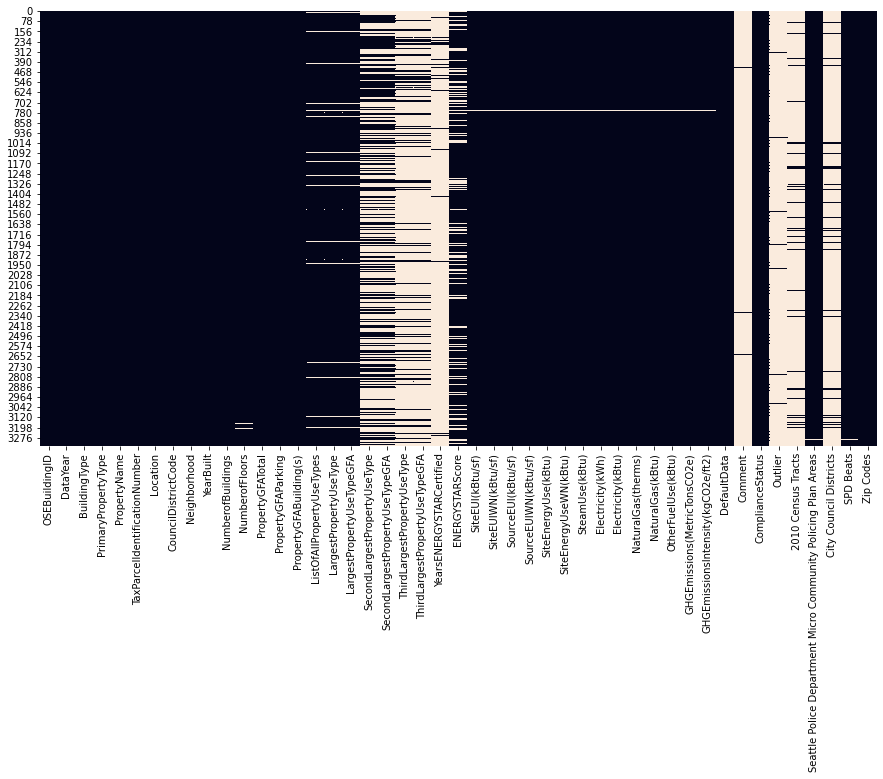

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(df_2015.isna(), cbar=False)

In [6]:
(df_2015.isna().mean()).sort_values(ascending=True)

OSEBuildingID                                                    0.000000
ComplianceStatus                                                 0.000000
PropertyGFABuilding(s)                                           0.000000
PropertyGFAParking                                               0.000000
PropertyGFATotal                                                 0.000000
NumberofBuildings                                                0.000000
YearBuilt                                                        0.000000
Neighborhood                                                     0.000000
Zip Codes                                                        0.000000
Location                                                         0.000000
PropertyName                                                     0.000000
PrimaryPropertyType                                              0.000000
BuildingType                                                     0.000000
DataYear                              

In [7]:
# On supprime les colonnes à NaN > 90%
cols = df_2015.isna().mean()<0.90
index_= cols[cols==True].index
df_2015 = df_2015[index_]

In [8]:
df_2016 = pd.read_csv(r"C:\Users\Damien\Desktop\Data Scientist\P4\Data\2016-building-energy-benchmarking.csv", sep=',')

In [9]:
df_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [10]:
df_2016.shape

(3376, 46)

<AxesSubplot:>

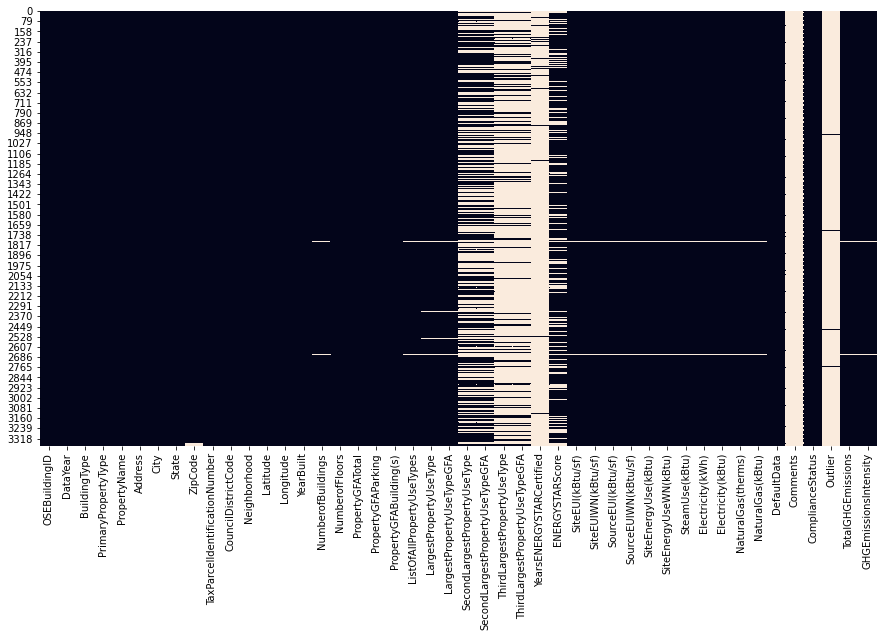

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(df_2016.isna(), cbar=False)

In [12]:
(df_2016.isna().mean()).sort_values(ascending=True)

OSEBuildingID                      0.000000
PropertyGFABuilding(s)             0.000000
PropertyGFAParking                 0.000000
PropertyGFATotal                   0.000000
NumberofFloors                     0.000000
YearBuilt                          0.000000
Longitude                          0.000000
Latitude                           0.000000
Neighborhood                       0.000000
DefaultData                        0.000000
CouncilDistrictCode                0.000000
ComplianceStatus                   0.000000
State                              0.000000
City                               0.000000
Address                            0.000000
PropertyName                       0.000000
PrimaryPropertyType                0.000000
BuildingType                       0.000000
DataYear                           0.000000
TaxParcelIdentificationNumber      0.000000
SiteEnergyUse(kBtu)                0.001481
SiteEnergyUseWN(kBtu)              0.001777
SiteEUIWN(kBtu/sf)              

In [13]:
# On supprime les colonnes à NaN > 90%
cols = df_2016.isna().mean()<0.90
index_= cols[cols==True].index
df_2016 = df_2016[index_]

N'ayant pas le même nombre de colonnes, on va observer laquelle ou lesquelles  sont differentes

### Travail sur colonnes différentes

In [14]:
df_2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'DefaultData', 'ComplianceStatus',
       'Seattle 

In [15]:
df_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions',
       'GHGEmissionsIntensity'],
 

In [16]:
col_2016 = list(df_2016.columns)
col_2015 = list(df_2015.columns)

In [17]:
list(set(col_2015) - set(col_2016))

['Zip Codes',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Seattle Police Department Micro Community Policing Plan Areas']

In [18]:
list(set(col_2016) - set(col_2015))

['ZipCode',
 'GHGEmissionsIntensity',
 'Latitude',
 'Address',
 'TotalGHGEmissions',
 'City',
 'State',
 'Longitude']

In [19]:
# On renomme les noms de colonnes 2015 qu'on retrouve sous un autre nom en 2016
df_2015 = df_2015.rename(columns={"GHGEmissions(MetricTonsCO2e)":"TotalGHGEmissions",
                        "GHGEmissionsIntensity(kgCO2e/ft2)" : "GHGEmissionsIntensity",
                        "Zip Codes" : "ZipCode"})

In [20]:
df_2015.BuildingType.value_counts()

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

Dans l'optique du concat, on perdrait Adress, City, State, Latitude, Longitude, Seattle Police Department Micro Community Policing Plan Areas, SPD Beats

In [21]:
df_2015 = df_2015.rename(columns={"Seattle Police Department Micro Community Policing Plan Areas":"Seattle_Police_Department_Micro_Community_Policing_Plan_Areas", 
                                 "SPD Beats" : "SPD_Beats"})

In [22]:
df_2015.Seattle_Police_Department_Micro_Community_Policing_Plan_Areas.value_counts()
# Inutile => On pourra la supprimer

50.0    342
8.0     239
56.0    218
14.0    209
46.0    172
       ... 
52.0      5
18.0      4
13.0      4
30.0      3
39.0      1
Name: Seattle_Police_Department_Micro_Community_Policing_Plan_Areas, Length: 61, dtype: int64

In [23]:
df_2015.SPD_Beats.value_counts()
# Inutile => On pourra la supprimer

40.0    198
5.0     127
9.0     124
10.0    124
12.0    117
36.0    115
39.0    114
7.0     113
38.0    102
27.0     84
22.0     84
48.0     82
19.0     81
4.0      79
1.0      78
28.0     77
49.0     75
50.0     74
35.0     73
26.0     73
20.0     73
11.0     71
2.0      71
47.0     68
3.0      64
30.0     64
37.0     58
24.0     57
6.0      51
31.0     51
16.0     50
32.0     50
33.0     50
34.0     46
17.0     40
21.0     39
29.0     38
25.0     36
15.0     36
42.0     35
13.0     35
51.0     35
18.0     32
8.0      29
41.0     29
45.0     27
44.0     26
43.0     24
14.0     24
23.0     20
46.0     15
Name: SPD_Beats, dtype: int64

In [24]:
df_2015['PropertyName'] = df_2015["PropertyName"].str.capitalize()

In [25]:
df_2015['PropertyName'].isin(df_2016['PropertyName']).value_counts()
# Beaucoup de petites differences dans le nommage des batiments

False    3297
True       43
Name: PropertyName, dtype: int64

In [26]:
df_2015['OSEBuildingID'].isin(df_2016['OSEBuildingID']).value_counts()

True     3284
False      56
Name: OSEBuildingID, dtype: int64

In [27]:
# Au vu du nombre de batiments identiques, on peut compléter les colonnes latitude et longitude de Création d'un dataframe pour ajouter les latitudes et longitudes des bâtiments en fonction de leur ID
df_2015 = df_2015.merge(df_2016[['OSEBuildingID', 'Latitude', 'Longitude']], on='OSEBuildingID')

In [28]:
df_2015 = df_2015.drop(['Location'], axis=1)

In [29]:
df = pd.concat([df_2015, df_2016], join="outer")
df.head(10)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Seattle_Police_Department_Micro_Community_Policing_Plan_Areas,SPD_Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2015,NonResidential,Hotel,Mayflower park hotel,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,Compliant,14.0,31.0,18081.0,47.61220,-122.33799,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,Paramount hotel,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,Compliant,14.0,31.0,18081.0,47.61317,-122.33393,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,Westin hotel,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,Compliant,56.0,31.0,18081.0,47.61393,-122.33810,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,Hotel max,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,Compliant,56.0,31.0,18081.0,47.61412,-122.33664,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,Warwick seattle hotel,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,Compliant,56.0,31.0,19576.0,47.61375,-122.34047,NaN,NaN,NaN
5,9,2015,Nonresidential COS,Other,West precinct (seattle police),660000560,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,135.7,146.9,313.5,321.6,12051984.0,13045258.0,0.0,2130921.0,7271004.0,47813.0,4781283.0,0.0,304.62,2.81,No,Compliant,56.0,7.0,19576.0,47.61623,-122.33657,NaN,NaN,NaN
6,10,2015,NonResidential,Hotel,Camlin worldmark hotel,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,25.0,76.9,79.6,149.5,158.2,6252842.0,6477493.0,0.0,785342.0,2679698.0,35733.0,3573255.0,0.0,208.46,2.37,No,Compliant,14.0,31.0,18081.0,47.61390,-122.33283,NaN,NaN,NaN
7,11,2015,NonResidential,Other,Paramount theater,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,62.5,71.8,152.2,160.4,6426022.0,7380086.0,2003108.0,1203937.0,4108004.0,3151.0,315079.0,0.0,199.99,1.77,No,Compliant,14.0,31.0,18081.0,47.61327,-122.33136,NaN,NaN,NaN
8,12,2015,NonResidential,Hotel,Courtyard by marriott - alaska bldg seattle,939000080,7,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Hotel,Hotel,163984.0,NaN,NaN,NaN,NaN,46.0,77.0,82.9,174.6,186.8,12633744.0,13589025.0,0.0,2155728.0,7355649.0,52784.0,5278400.0,0.0,331.61,1.83,No,Compliant,14.0,19.0,18379.0,47.60294,-122.33263,NaN,NaN,NaN
9,13,2015,Multifamily MR (5-9),Mid-Rise Multifamily,Lyon building,939000105,7,DOWNTOWN,1910,1.0,6.0,63712,1496,62216,

In [30]:
df.shape

(6660, 46)

### Duplicates

In [31]:
# On enleve les doublons 2015-2016 de df pour merge avec df_means (pour avoir le même nombre de lignes)
df.astype({'OSEBuildingID': 'int32'}).dtypes
data = df.drop_duplicates(subset=['OSEBuildingID'], keep='last')

In [32]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Seattle_Police_Department_Micro_Community_Policing_Plan_Areas,SPD_Beats,ZipCode,Latitude,Longitude,Address,City,State
0,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,NaN,249.98,2.83,False,Compliant,NaN,NaN,98101.0,47.61220,-122.33799,405 Olive way,Seattle,WA
1,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,NaN,295.86,2.86,False,Compliant,NaN,NaN,98101.0,47.61317,-122.33393,724 Pine street,Seattle,WA
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,NaN,2089.28,2.19,False,Compliant,NaN,NaN,98101.0,47.61393,-122.33810,1900 5th Avenue,Seattle,WA
3,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,NaN,286.43,4.67,False,Compliant,NaN,NaN,98101.0,47.61412,-122.33664,620 STEWART ST,Seattle,WA
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,NaN,505.01,2.88,False,Compliant,NaN,NaN,98121.0,47.61375,-122.34047,401 LENORA ST,Seattle,WA


In [33]:
data.shape

(3376, 46)

### Suppression des colonnes inutiles / redondantes

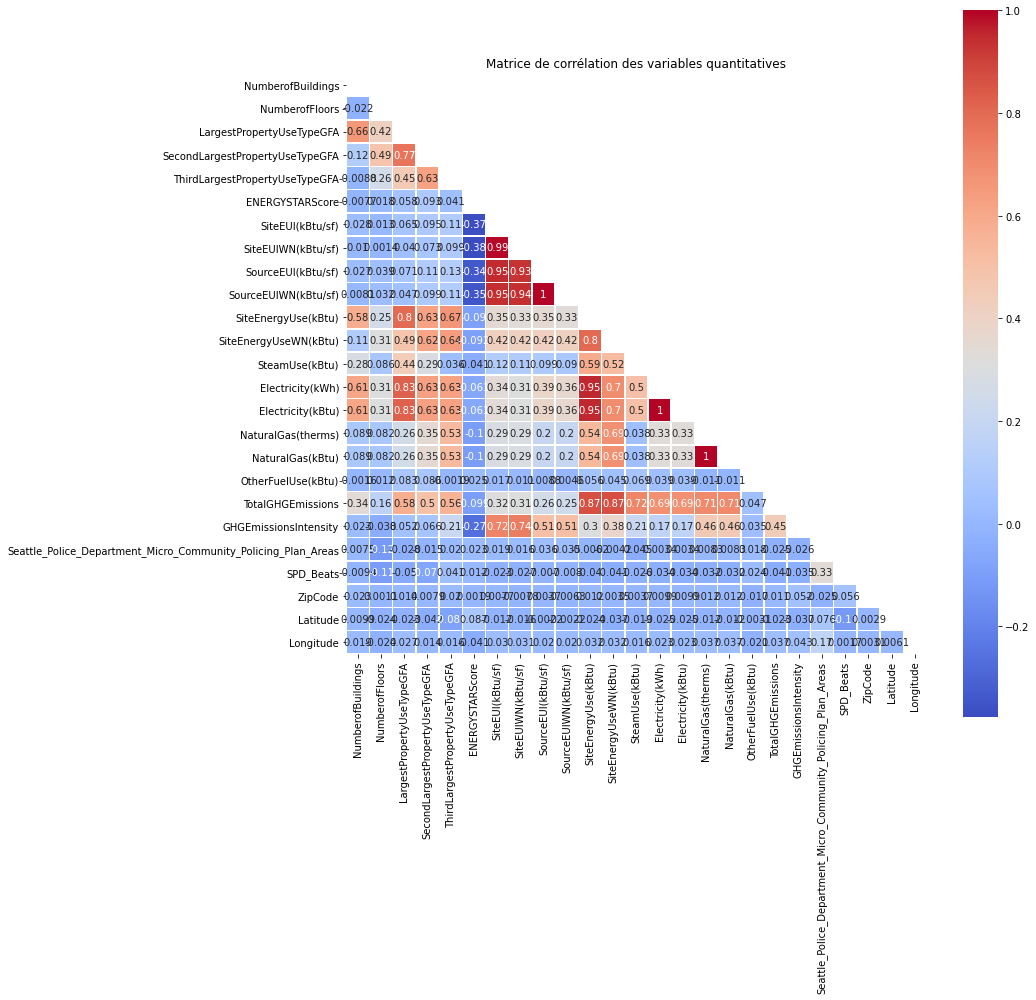

In [34]:
corr_matrix = df.select_dtypes('float').corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

# Grace aux corrélations, on peut supprimer NaturalGas(therms), Electricity(kWh), SourceEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu)
# Les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.

In [35]:
# Etant donné qu'on a les lat/long, et que la dataset concerne Seattle, on peut drop Adress, City State, et donc Seattle police et SPD_Beats + colonnes inutiles
locations = ['PropertyName', 'Seattle_Police_Department_Micro_Community_Policing_Plan_Areas', 'SPD_Beats', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'ZipCode', 'DefaultData', 'ComplianceStatus', 'Electricity(kWh)', 'NaturalGas(therms)', 'SourceEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']
data = data.drop(locations, axis=1)

In [36]:
data.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
0,1,2016,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,7226362.5,2003882.00,3946027.0,1276453.0,NaN,249.98,2.83,47.61220,-122.33799
1,2,2016,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,8387933.0,0.00,3242851.0,5145082.0,NaN,295.86,2.86,47.61317,-122.33393
2,3,2016,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,72587024.0,21566554.00,49526664.0,1493800.0,NaN,2089.28,2.19,47.61393,-122.33810
3,5,2016,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,6794584.0,2214446.25,2768924.0,1811213.0,NaN,286.43,4.67,47.61412,-122.33664
4,8,2016,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,14172606.0,0.00,5368607.0,8803998.0,NaN,505.01,2.88,47.61375,-122.34047


In [37]:
data.describe()

,OSEBuildingID,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
count,3376.000000,3376.0,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3.371000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000,3376.000000,3376.000000
mean,21208.991114,2016.0,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,5.403667e+06,2.745959e+05,3.707612e+06,1.368505e+06,NaN,119.723971,1.175916,47.624033,-122.334795
std,12223.757015,0.0,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,2.161063e+07,3.912173e+06,1.485066e+07,6.709781e+06,NaN,538.832227,1.821452,0.047758,0.027203
min,1.000000,2016.0,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,NaN,-0.800000,-0.020000,47.499170,-122.414250
25%,19990.750000,2016.0,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,9.251286e+05,0.000000e+00,6.394870e+05,0.000000e+00,NaN,9.495000,0.210000,47.599860,-122.350662
50%,23112.000000,2016.0,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,1.803753e+06,0.000000e+00,1.177583e+06,3.237540e+05,NaN,33.920000,0.610000,47.618675,-122.332495
75%,25994.250000,2016.0,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,4.222455e+06,0.000000e+00,2.829632e+06,1.189034e+06,NaN,93.940000,1.370000,47.657115,-122.319407
max,50226.000000,2016.0,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,8.739237e+08,1.349435e+08,6.570744e+08,2.979090e+08,NaN,16870.980000,34.090000,47.733870,-122.220966


In [38]:
tmp = data.describe(include="object")
tmp

,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
count,3376,3376,3376,3367,3356,1679,596
unique,8,24,19,466,56,50,44
top,NonResidential,Low-Rise Multifamily,DOWNTOWN,Multifamily Housing,Multifamily Housing,Parking,Retail Store
freq,1460,987,573,866,1667,976,110


In [39]:
# On supprime les lignes qui contiennent un SiteEnergyUse(kBtu) et TotalGHGEmissions Nan (car ce sont nos Target)
data_cleaned = data.dropna(subset=['SiteEnergyUse(kBtu)'])
data_cleaned = data_cleaned.dropna(subset=['TotalGHGEmissions'])

In [40]:
data_cleaned = data_cleaned[data_cleaned['SiteEnergyUse(kBtu)'] != 0]
data_cleaned = data_cleaned[data_cleaned['TotalGHGEmissions'] != 0]

In [41]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3347 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3347 non-null   int64  
 1   DataYear                         3347 non-null   int64  
 2   BuildingType                     3347 non-null   object 
 3   PrimaryPropertyType              3347 non-null   object 
 4   Neighborhood                     3347 non-null   object 
 5   YearBuilt                        3347 non-null   int64  
 6   NumberofBuildings                3347 non-null   float64
 7   NumberofFloors                   3347 non-null   float64
 8   PropertyGFATotal                 3347 non-null   int64  
 9   PropertyGFAParking               3347 non-null   int64  
 10  PropertyGFABuilding(s)           3347 non-null   int64  
 11  ListOfAllPropertyUseTypes        3347 non-null   object 
 12  LargestPropertyUseTy

### Valeurs aberrantes

In [42]:
data_cleaned.loc[data_cleaned['Electricity(kBtu)'] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,Office,48159.0,NaN,NaN,NaN,NaN,100.0,7.1,342726.0938,0.0,-115417.0,0.0,NaN,-0.8,-0.02,47.61432,-122.31257


In [43]:
data_cleaned.loc[data_cleaned["TotalGHGEmissions"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
3206,49784,2016,NonResidential,Small- and Mid-Sized Office,CENTRAL,2013,1.0,6.0,52000,0,52000,Office,Office,48159.0,NaN,NaN,NaN,NaN,100.0,7.1,342726.0938,0.0,-115417.0,0.0,NaN,-0.8,-0.02,47.61432,-122.31257


Ce batiment est après verification un batiment à energie positive. Concu en 2013, il a été pensé pour preduire 30% d'excedent d'energie grace à des panneaux solaires situés sur le toit (https://en.wikipedia.org/wiki/Bullitt_Center)

In [44]:
data_cleaned.loc[data_cleaned["PropertyGFATotal"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude


In [45]:
data_cleaned.loc[data_cleaned["SiteEnergyUse(kBtu)"] < 0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude


In [46]:
# Ce batiment n'étant pas pertinent dans notre analyse nous allons le supprimer du dataset
data_cleaned = data_cleaned.loc[data_cleaned['Electricity(kBtu)'] > 0]

In [47]:
# On a vu dans une première analyse de fond qu'un batiment consomme beaucoup plus d'energie que les autres, et possède une superficie total bien superieur aux autres, c'est le campus de l'université de Washington. On l'enleverra également du dataset
data_cleaned.loc[data_cleaned["SiteEnergyUse(kBtu)"] == 873923712.0]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
3274,49967,2016,Campus,University,NORTHEAST,1900,111.0,0.0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,93.800003,873923712.0,84985240.0,657074389.0,0.0,NaN,11140.56,1.2,47.65644,-122.31041


In [48]:
data_cleaned.loc[data_cleaned["PropertyGFATotal"] == 9320156]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
3274,49967,2016,Campus,University,NORTHEAST,1900,111.0,0.0,9320156,0,9320156,College/University,College/University,9320156.0,NaN,NaN,NaN,NaN,NaN,93.800003,873923712.0,84985240.0,657074389.0,0.0,NaN,11140.56,1.2,47.65644,-122.31041


In [49]:
data_cleaned = data_cleaned.loc[data_cleaned["SiteEnergyUse(kBtu)"] != data_cleaned["SiteEnergyUse(kBtu)"].max()]

## Analyse de fond

### Repartion variable Qual

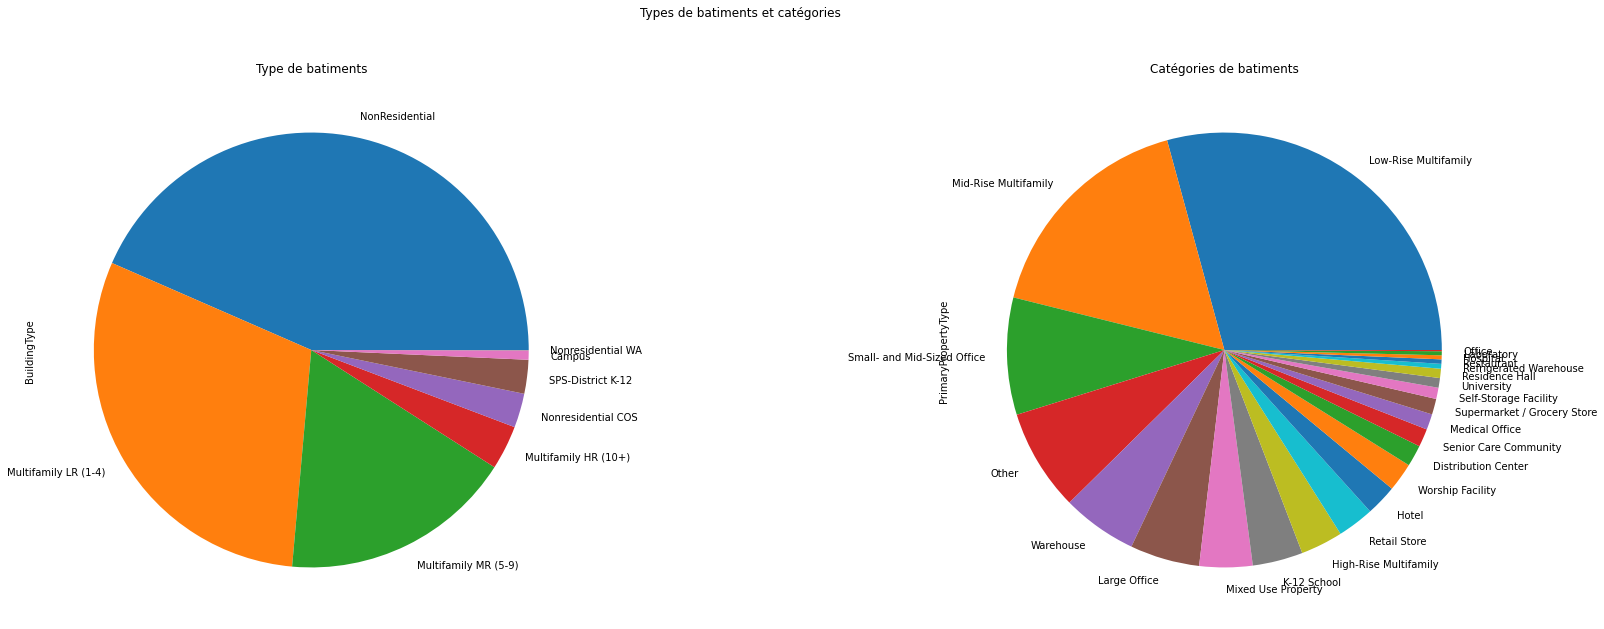

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('Types de batiments et catégories')

plt.figure(figsize=(10,10))
data_cleaned.BuildingType.value_counts().plot.pie(ax=axes[0])
axes[0].set_title('Type de batiments')

plt.figure(figsize=(10,10))
data_cleaned.PrimaryPropertyType.value_counts().plot.pie(ax=axes[1])
axes[1].set_title('Catégories de batiments')

plt.show()

In [51]:
# Distribution des types de batiments
data_cleaned.BuildingType.value_counts()

NonResidential          1453
Multifamily LR (1-4)    1008
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
Nonresidential COS        85
SPS-District K-12         84
Campus                    23
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [52]:
# Regardons les 'types de propriétés principales' dans les batiments 'non residentiels'
data_cleaned.loc[(data_cleaned['BuildingType']=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    286
Other                          183
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     39
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Laboratory                      10
Hospital                        10
Restaurant                      10
Low-Rise Multifamily             2
Name: PrimaryPropertyType, dtype: int64

In [53]:
data_cleaned.loc[(data_cleaned['BuildingType']=="Nonresidential COS"),'PrimaryPropertyType'].value_counts()

Other                          56
Mixed Use Property              8
Warehouse                       7
Small- and Mid-Sized Office     4
Large Office                    4
Office                          3
Distribution Center             2
Medical Office                  1
Name: PrimaryPropertyType, dtype: int64

In [54]:
# Les 2 types n'ayant pas tellement d'interet à etre séparés, on réunit Nonresidential COS et Nonresidential
data_cleaned['BuildingType'].loc[data_cleaned["BuildingType"].str.contains('Nonresidential COS', case=False, regex=False)] = 'NonResidential'

In [55]:
data_cleaned.loc[(data_cleaned['BuildingType']=="Nonresidential WA"),'PrimaryPropertyType'].value_counts()

University    1
Name: PrimaryPropertyType, dtype: int64

In [56]:
# On intègrer Nonresidential WA dans Campus
data_cleaned['BuildingType'].loc[data_cleaned["BuildingType"].str.contains('Nonresidential WA', case=False, regex=False)] = 'Campus'

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [57]:
data_cleaned.loc[(data_cleaned['BuildingType']=="SPS-District K-12"),'PrimaryPropertyType'].value_counts()

K-12 School    82
Other           2
Name: PrimaryPropertyType, dtype: int64

In [58]:
# Le sigle K-12 est couramment employé aux États-Unis pour désigner l'ensemble du cursus scolaire, de la maternelle (Kindergarten) au secondaire (grade 12) => Intégrer dans Campus
data_cleaned['BuildingType'].loc[data_cleaned["BuildingType"].str.contains('SPS-District K-12', case=False, regex=False)] = 'Campus'

In [59]:
# Creation de variable type residentiel
residentiel = data_cleaned[(data_cleaned['BuildingType']=="Multifamily LR (1-4)")+(data_cleaned['BuildingType']=="Multifamily MR (5-9)")+(data_cleaned['BuildingType']=="Multifamily HR (10+)")]

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


In [60]:
# On peut avoir envie d'observer les repartitions entre Low/Mid/High rise family, donc on ne fera pas de réunion de ces types
residentiel.PrimaryPropertyType.value_counts()

Low-Rise Multifamily           975
Mid-Rise Multifamily           564
High-Rise Multifamily          105
Senior Care Community           25
Mixed Use Property              19
Other                            5
Residence Hall                   2
Hotel                            1
University                       1
Small- and Mid-Sized Office      1
Name: PrimaryPropertyType, dtype: int64

In [61]:
data_cleaned.loc[(data_cleaned['BuildingType']=="Campus"),'PrimaryPropertyType'].value_counts()

K-12 School             86
Other                    9
University               6
Mixed Use Property       4
Restaurant               1
Low-Rise Multifamily     1
Large Office             1
Name: PrimaryPropertyType, dtype: int64

In [62]:
# On remarque plusieurs doublons qu'on harmonisera
data_cleaned.Neighborhood.value_counts()

DOWNTOWN                  569
EAST                      452
MAGNOLIA / QUEEN ANNE     419
GREATER DUWAMISH          375
NORTHEAST                 276
LAKE UNION                249
NORTHWEST                 208
SOUTHWEST                 163
NORTH                     143
BALLARD                   124
CENTRAL                   103
SOUTHEAST                  94
DELRIDGE                   79
North                      41
Central                    26
Northwest                  11
Ballard                     7
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

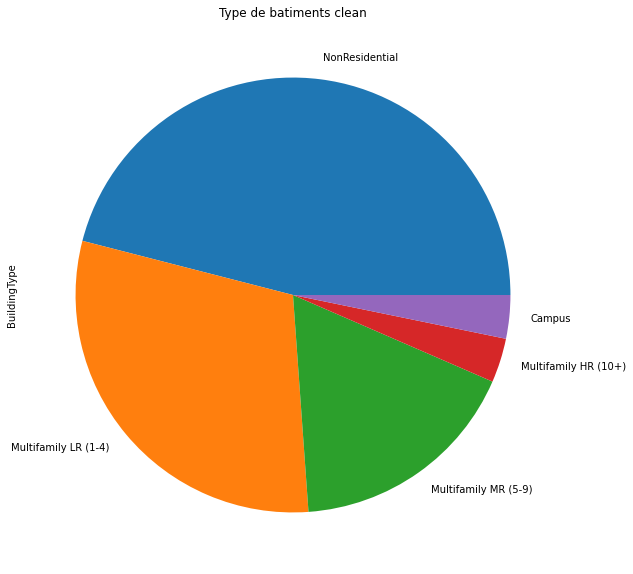

In [63]:
plt.figure(figsize=(10,10))
data_cleaned.BuildingType.value_counts().plot.pie()
plt.title("Type de batiments clean")
plt.show()

**On voit 3 familles de type de batiments: Residentiel (majoritairement composé d'habitations "familiales") / Non residentiels (Majoritairement des bureaux ou entrepots) / Autres (Campus et SPS-District).** 

On va faire le meme travail de regroupement sur PrimaryPropertyType, et on va attribuer aux Other la valeur de LargestPropertyUseType ou SecondLargestPropertyUseType

In [64]:
data_cleaned.PrimaryPropertyType.value_counts()

Low-Rise Multifamily           978
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    291
Other                          253
Warehouse                      187
Large Office                   173
Mixed Use Property             132
K-12 School                    125
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Medical Office                  39
Supermarket / Grocery Store     39
Self-Storage Facility           28
University                      24
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [65]:
data_largest = data_cleaned.loc[data_cleaned["PrimaryPropertyType"] == 'Other']
data_largest

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
5,9,2016,NonResidential,Other,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,1.208662e+07,0.0,7.371434e+06,4.715182e+06,NaN,301.81,3.10,47.61623,-122.33657
7,11,2016,NonResidential,Other,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,61.299999,6.298132e+06,2276286.5,3.636655e+06,3.851890e+05,NaN,221.51,2.16,47.61327,-122.33136
15,21,2016,NonResidential,Other,DOWNTOWN,2004,1.0,11.0,412000,57000,355000,"Data Center, Library, Parking",Library,364913.0,Parking,49000.0,Data Center,1074.0,NaN,50.799999,1.858886e+07,737559.5,1.785130e+07,0.000000e+00,NaN,181.38,0.44,47.60649,-122.33297
16,22,2016,NonResidential,Other,DOWNTOWN,1930,1.0,6.0,103911,0,103911,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN,76.599998,9.956396e+06,4592347.5,4.453868e+06,9.101800e+05,NaN,433.86,4.18,47.60546,-122.33279
20,26,2016,NonResidential,Other,DOWNTOWN,1916,1.0,10.0,540360,0,540360,Courthouse,Courthouse,537150.0,NaN,NaN,NaN,NaN,76.0,83.699997,4.498447e+07,0.0,2.435783e+07,2.062663e+07,NaN,1265.29,2.34,47.60265,-122.33051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,50208,2016,NonResidential,Other,BALLARD,1972,1.0,1.0,12769,0,12769,"Fitness Center/Health Club/Gym, Office, Other ...",Other - Recreation,10912.0,Fitness Center/Health Club/Gym,1670.0,Office,187.0,NaN,400.799988,5.117308e+06,0.0,1.205173e+06,3.912135e+06,NaN,216.18,16.93,47.67734,-122.37624
3367,50212,2016,NonResidential,Other,EAST,1912,1.0,1.0,23445,0,23445,Other - Recreation,Other - Recreation,23445.0,NaN,NaN,NaN,NaN,NaN,254.899994,5.976246e+06,0.0,1.260870e+06,4.715376e+06,NaN,259.22,11.06,47.63228,-122.31574
3370,50221,2016,NonResidential,Other,DELRIDGE NEIGHBORHOODS,1982,1.0,1.0,18261,0,18261,Other - Recreation,Other - Recreation,18261.0,NaN,NaN,NaN,NaN,NaN,51.000000,9.320821e+05,0.0,6.323620e+05,2.997200e+05,NaN,20.33,1.11,47.54067,-122.37441
3372,50223,2016,NonResidential,Other,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,59.400002,9.502762e+05,0.0,3.965461e+05,5.537300e+05,NaN,32.17,2.01,47.59625,-122.32283


In [66]:
data_largest.LargestPropertyUseType.value_counts()

Other                                                   91
Other - Recreation                                      26
Other - Entertainment/Public Assembly                   18
Parking                                                 17
Manufacturing/Industrial Plant                           8
Social/Meeting Hall                                      8
Other - Lodging/Residential                              6
Repair Services (Vehicle, Shoe, Locksmith, etc)          6
Automobile Dealership                                    5
Other - Services                                         5
Strip Mall                                               5
Museum                                                   5
Other/Specialty Hospital                                 4
Library                                                  4
Urgent Care/Clinic/Other Outpatient                      4
Other - Mall                                             4
Financial Office                                        

In [67]:
data_cleaned['LargestPropertyUseType'].fillna(value="None", inplace=True)

In [68]:
# Création de groupes
crea_groupes = {"Other - Recreation" : "Sport",
                "Other - Entertainment/Public Assembly  " : "Public Services",
                "Social/Meeting Hall" : "Public Services",
                "Manufacturing/Industrial Plant": "Industrie",
                "Repair Services (Vehicle, Shoe, Locksmith, etc)" : "Shops",
                "Other - Lodging/Residential" : "Residentiel",
                "Other - Services" : "Shops",
                "Strip Mall": "Mall",
                "Museum" : "Public Services",
                "Automobile Dealership": "Shops",
                "Library" : "Public Services",
                "Financial Office" : "Shops",
                "Other/Specialty Hospital" : "Sante",
                "Other - Mall" : "Mall",
                "Urgent Care/Clinic/Other Outpatient" : "Sante",               
                "Prison/Incarceration" : "Public Services",
                "Performing Arts" : "School",
                "Bank Branch" : "Shops",
                "Data Center" : "Industrie",               
                "Fitness Center/Health Club/Gym" : "Sport",
                "Adult Education" : "School",
                "Other - Public Services" : "Public Services",
                "Lifestyle Center" : "Mall",               
                "Pre-school/Daycare" : "School",
                "Other - Utility" : "Utilitaire",
                "Other - Education" : "School",
                "Personal Services (Health/Beauty, Dry Cleaning, etc)" : "Utilitaire",             
                "Fire Station" : "Public Services",
                "Police Station" : "Public Services",               
                "Residential Care Facility" : "Public Services",
                "Movie Theater" : "Public Services",
                "Food Service" : "Utilitaire",
                "Courthouse" : "Public Services"}

for key, value in crea_groupes.items():
    data_cleaned['LargestPropertyUseType'].loc[data_cleaned["LargestPropertyUseType"].str.contains(key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [69]:
data_cleaned.LargestPropertyUseType.value_counts()

Multifamily Housing                      1665
Office                                    497
Non-Refrigerated Warehouse                199
K-12 School                               125
Other                                     101
Retail Store                               99
Hotel                                      77
Worship Facility                           71
Distribution Center                        54
Senior Care Community                      46
Medical Office                             41
Supermarket/Grocery Store                  40
Sport                                      36
Parking                                    32
Public Services                            29
Self-Storage Facility                      28
Residence Hall/Dormitory                   24
Shops                                      24
College/University                         24
Other - Entertainment/Public Assembly      21
Laboratory                                 13
Mall                              

In [70]:
data_cleaned['PrimaryPropertyType'] = np.where(data_cleaned['PrimaryPropertyType'] == 'Other', data_cleaned['LargestPropertyUseType'], data_cleaned['PrimaryPropertyType'])

In [71]:
data_cleaned.head(20)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
0,1,2016,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,7226362.5,2.003882e+06,3946027.0,1276453.0,NaN,249.98,2.83,47.61220,-122.33799
1,2,2016,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,8387933.0,0.000000e+00,3242851.0,5145082.0,NaN,295.86,2.86,47.61317,-122.33393
2,3,2016,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,72587024.0,2.156655e+07,49526664.0,1493800.0,NaN,2089.28,2.19,47.61393,-122.33810
3,5,2016,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,6794584.0,2.214446e+06,2768924.0,1811213.0,NaN,286.43,4.67,47.61412,-122.33664
4,8,2016,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,14172606.0,0.000000e+00,5368607.0,8803998.0,NaN,505.01,2.88,47.61375,-122.34047
5,9,2016,NonResidential,Public Services,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Public Services,88830.0,NaN,NaN,NaN,NaN,NaN,136.100006,12086616.0,0.000000e+00,7371434.0,4715182.0,NaN,301.81,3.10,47.61623,-122.33657
6,10,2016,NonResidential,Hotel,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,27.0,70.800003,5758795.0,0.000000e+00,2811215.0,2947580.0,NaN,176.14,2.12,47.61390,-122.33283
7,11,2016,NonResidential,Other - Entertainment/Public Assembly,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,NaN,NaN,NaN,NaN,61.299999,6298131.5,2.276286e+06,3636655.0,385189.0,NaN,221.51,2.16,47.61327,-122.33136
8,12,2016,NonResidential,Hotel,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Hotel,Hotel,163984.0,NaN,NaN,NaN,NaN,43.0,83.699997,13723820.0,0.000000e+00,7297919.0,6425900.0,NaN,392.16,2.39,47.60294,-122.33263
9,13,2016,Multifamily MR (5-9),Mid-Rise Multifamily,DOWNTOWN,1910,1.0,6.0,63712,1496,62216,Multifamily Housing,Multifamily Housing,56132.0,NaN,NaN,NaN,NaN,1.0,81.500000,4573777.0,1.039735e+06,2532015.0,1002026.0,NaN,151.12,2.37,47.60284,-122.33184


In [72]:
data_cleaned.PrimaryPropertyType.value_counts()

Low-Rise Multifamily                     978
Mid-Rise Multifamily                     564
Small- and Mid-Sized Office              291
Warehouse                                187
Large Office                             173
Mixed Use Property                       132
K-12 School                              125
High-Rise Multifamily                    105
Retail Store                              91
Other                                     91
Hotel                                     77
Worship Facility                          71
Distribution Center                       53
Senior Care Community                     45
Medical Office                            39
Supermarket / Grocery Store               39
Sport                                     29
Self-Storage Facility                     28
Public Services                           27
University                                24
Shops                                     23
Residence Hall                            23
Other - En

In [73]:
data_largest2 = data_cleaned.loc[data_cleaned["PrimaryPropertyType"] == 'Other']
data_largest2

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude
21,27,2016,NonResidential,Other,DOWNTOWN,1985,1.0,19.0,385274,0,385274,Other,Other,385274.0,NaN,NaN,NaN,NaN,NaN,124.199997,4.785981e+07,0.0,18257661.0,29602150.0,NaN,1699.45,4.41,47.60378,-122.32842
69,103,2016,NonResidential,Other,MAGNOLIA / QUEEN ANNE,1962,1.0,1.0,389000,0,389000,Other,Other,368000.0,NaN,NaN,NaN,NaN,NaN,64.300003,2.365898e+07,6093150.0,14419146.0,688680.0,NaN,607.41,1.56,47.62208,-122.35398
70,104,2016,NonResidential,Other,MAGNOLIA / QUEEN ANNE,1962,1.0,1.0,91213,0,91213,Other,Other,65000.0,NaN,NaN,NaN,NaN,NaN,125.199997,8.141156e+06,4120130.0,3754115.0,0.0,NaN,344.20,3.77,47.62208,-122.35398
71,106,2016,NonResidential,Other,MAGNOLIA / QUEEN ANNE,1938,1.0,5.0,396085,0,396085,Other,Other,278500.0,NaN,NaN,NaN,NaN,NaN,75.199997,2.095503e+07,9763690.0,7252325.0,0.0,NaN,804.20,2.03,47.62208,-122.35398
73,110,2016,NonResidential,Other,MAGNOLIA / QUEEN ANNE,1962,1.0,2.0,52000,0,52000,Other,Other,52000.0,NaN,NaN,NaN,NaN,NaN,52.400002,2.726369e+06,1202380.0,1293349.0,0.0,NaN,101.83,1.96,47.62395,-122.35077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,27892,2016,NonResidential,Other,NORTHEAST,1929,1.0,3.0,27908,0,27908,Other,Other,21886.0,NaN,NaN,NaN,NaN,NaN,92.699997,2.028126e+06,0.0,964426.0,1063700.0,NaN,63.22,2.27,47.66506,-122.31656
3064,28030,2016,NonResidential,Other,GREATER DUWAMISH,1907,1.0,5.0,36000,0,36000,Other,Other,36000.0,NaN,NaN,NaN,NaN,NaN,30.900000,1.111294e+06,0.0,346376.0,764918.0,NaN,43.04,1.20,47.56166,-122.32370
3152,43948,2016,NonResidential,Other,GREATER DUWAMISH,1906,1.0,2.0,39212,0,39212,Other,Other,39212.0,NaN,NaN,NaN,NaN,NaN,1.800000,7.237040e+04,0.0,72371.0,0.0,NaN,0.50,0.01,47.54277,-122.31626
3182,49725,2016,NonResidential,Other,EAST,2012,1.0,7.0,267470,0,267470,"Hospital (General Medical & Surgical), Other",Other,160482.0,Hospital (General Medical & Surgical),106988.0,NaN,NaN,NaN,159.199997,4.258403e+07,18547858.0,23795911.0,0.0,NaN,1597.56,5.97,47.60989,-122.32659


In [74]:
data_largest2.SecondLargestPropertyUseType.value_counts()

Parking                                            12
Office                                             10
Retail Store                                        4
Distribution Center                                 1
Hospital (General Medical & Surgical)               1
Courthouse                                          1
Repair Services (Vehicle, Shoe, Locksmith, etc)     1
Name: SecondLargestPropertyUseType, dtype: int64

In [75]:
data_cleaned['PrimaryPropertyType'] = np.where(data_cleaned['PrimaryPropertyType'] == 'Other', data_cleaned['SecondLargestPropertyUseType'], data_cleaned['PrimaryPropertyType'])

In [76]:
data_cleaned['PrimaryPropertyType'].fillna(value="None", inplace=True)

In [77]:
data_cleaned.PrimaryPropertyType.value_counts()

Low-Rise Multifamily                               978
Mid-Rise Multifamily                               564
Small- and Mid-Sized Office                        291
Warehouse                                          187
Large Office                                       173
Mixed Use Property                                 132
K-12 School                                        125
High-Rise Multifamily                              105
Retail Store                                        95
Hotel                                               77
Worship Facility                                    71
None                                                61
Distribution Center                                 54
Senior Care Community                               45
Medical Office                                      39
Supermarket / Grocery Store                         39
Parking                                             29
Sport                                               29
Self-Stora

In [78]:
# Regroupement de certains types de  bâtiments dans des catégories uniques
crea_groupes2 = {"Small- and Mid-Sized Office" : "Office",
                 "Large Office" : "Office", 
                 "K-12 School " : "School",
                 "Distribution Center" : "Warehouse",
                 "Senior Care Community" : "Public Services",
                 "Medical Office" : "Office",
                 "Supermarket / Grocery Store" : "Mall",
                 "Self-Storage Facility" : "Warehouse",
                 "Residence Hall" : "Public Services", 
                 "Other - Entertainment/Public Assembly" : "Public Services",
                 "Refrigerated Warehouse" : "Warehouse",
                 "Laboratory" : "Sante",
                 "Hospital" : "Sante",
                 "School" : "University",
                 "Residentiel" : "Mid-Rise Multifamily",
                 "Utilitaire " : "Shops",
                 "Hospital (General Medical & Surgical)" : "Sante",
                 "Courthouse" : "Public Services",
                 "Repair Services (Vehicle, Shoe, Locksmith, etc)" : "Shops"}

for key, value in crea_groupes2.items():
    data_cleaned['PrimaryPropertyType'].loc[data_cleaned["PrimaryPropertyType"].str.contains(key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


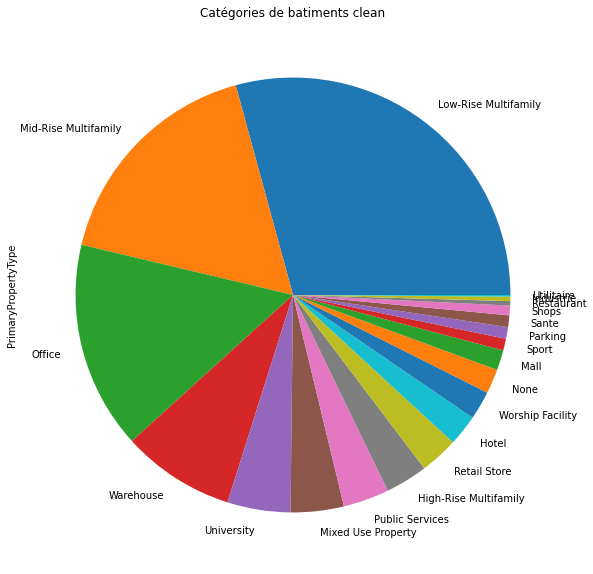

In [124]:
plt.figure(figsize=(10,10))
data_cleaned.PrimaryPropertyType.value_counts().plot.pie()
plt.title("Catégories de batiments clean")
plt.show()

On a vu que certains batiments avaient un NumberofBuildings egale à zero, alors qu'ils ont des étages. On met 1 batiment à la place de zero

In [80]:
data_cleaned['NumberofBuildings'] = np.where(data_cleaned['NumberofBuildings'] == 0.0, 1.0, data_cleaned['NumberofBuildings'])

### Visualisation

In [81]:
# Passage de la colonne BuildingType au numeric
def BuildingType(row):
    if row["BuildingType"] == "Campus":
        val="0"
    elif row["BuildingType"] == "NonResidential":
        val="1"
    elif row["BuildingType"] == "Multifamily HR (10+)":
        val="2"
    elif row["BuildingType"] == "Multifamily LR (1-4)":
        val="3"
    elif row["BuildingType"] == "Multifamily MR (5-9)":
        val="4"
    else:
        val="5"
    return val

data_cleaned_map = data_cleaned.copy()
data_cleaned_map['BuildingType'] = data_cleaned_map.apply(BuildingType, axis=1)

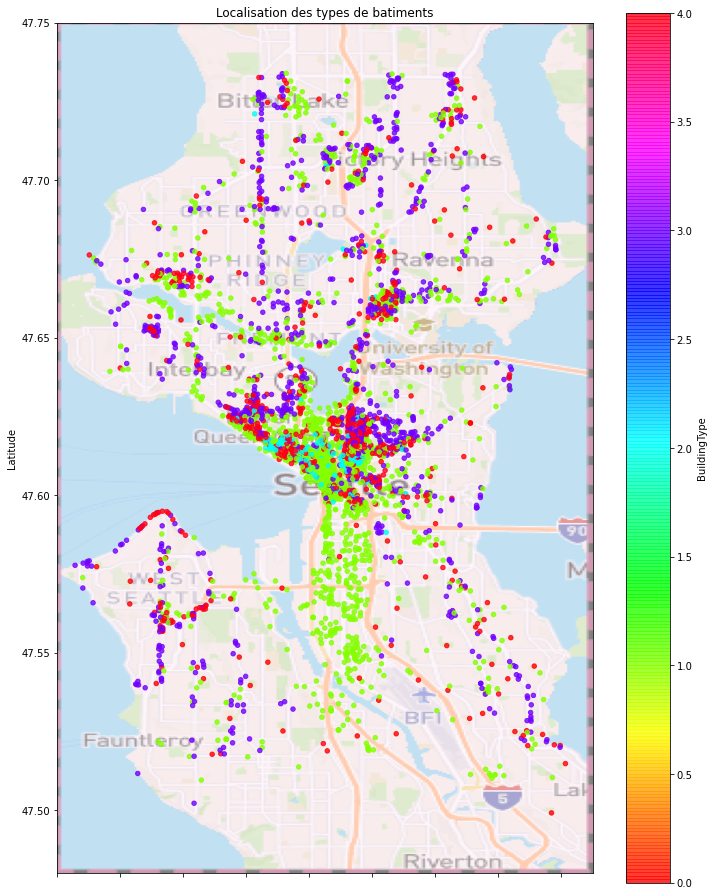

In [82]:
# Image pris sur bboxfinder.com
import matplotlib.image as mpimg

data_cleaned_map['BuildingType'] = data_cleaned_map['BuildingType'].astype("int64")

seattle_img=mpimg.imread(r'C:\Users\Damien\Desktop\Data Scientist\P4\Captures\Seattle.png')
ax = data_cleaned_map.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(12,16),
        alpha = 0.8, c="BuildingType", colorbar=True, cmap=plt.get_cmap("hsv"))
plt.imshow(seattle_img, extent=[-122.42, -122.25, 47.48, 47.75], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Localisation des types de batiments")
plt.show()

In [83]:
# Harmonisation des noms
neighborhood = {'North' : 'NORTH',
                'Central' : 'CENTRAL', 
                'Northwest' : 'NORTHWEST',
                'Ballard' : 'BALLARD',
                'Delridge' : 'DELRIDGE',
                'DELRIDGE NEIGHBORHOODS' : 'DELRIDGE'}

for key, value in neighborhood.items():
    data_cleaned['Neighborhood'].loc[data_cleaned["Neighborhood"].str.contains(key, case=False, regex=False)] = value

D:\Users\Damien\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### Analyse univariée

#### Targets

Nos Targets sont SiteEnergyUse(kBtu): **consommation d'énergie du bâtiment** et TotalGHGEmissions: **émissions de CO2**

In [84]:
# On passe nos tagets au log
data_cleaned['SiteEnergyUse(kBtu)_log'] = np.log(data_cleaned['SiteEnergyUse(kBtu)'])
data_cleaned['TotalGHGEmissions_log'] = np.log(data_cleaned['TotalGHGEmissions'])

<AxesSubplot:ylabel='SiteEnergyUse(kBtu)_log'>

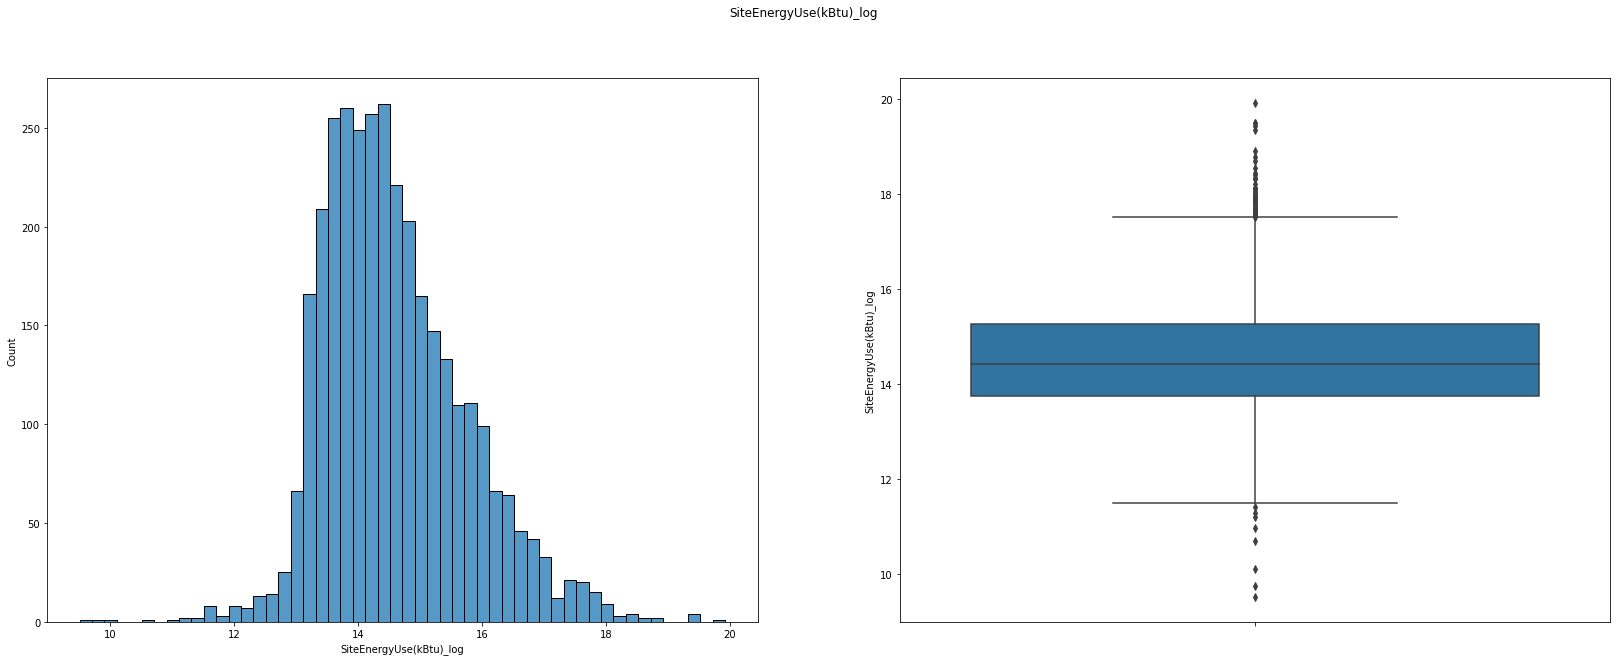

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('SiteEnergyUse(kBtu)_log')

# histplot
sns.histplot(ax=axes[0], data=data_cleaned, x="SiteEnergyUse(kBtu)_log")

# Boxplot
sns.boxplot(ax=axes[1], data=data_cleaned, y='SiteEnergyUse(kBtu)_log')

<AxesSubplot:ylabel='TotalGHGEmissions_log'>

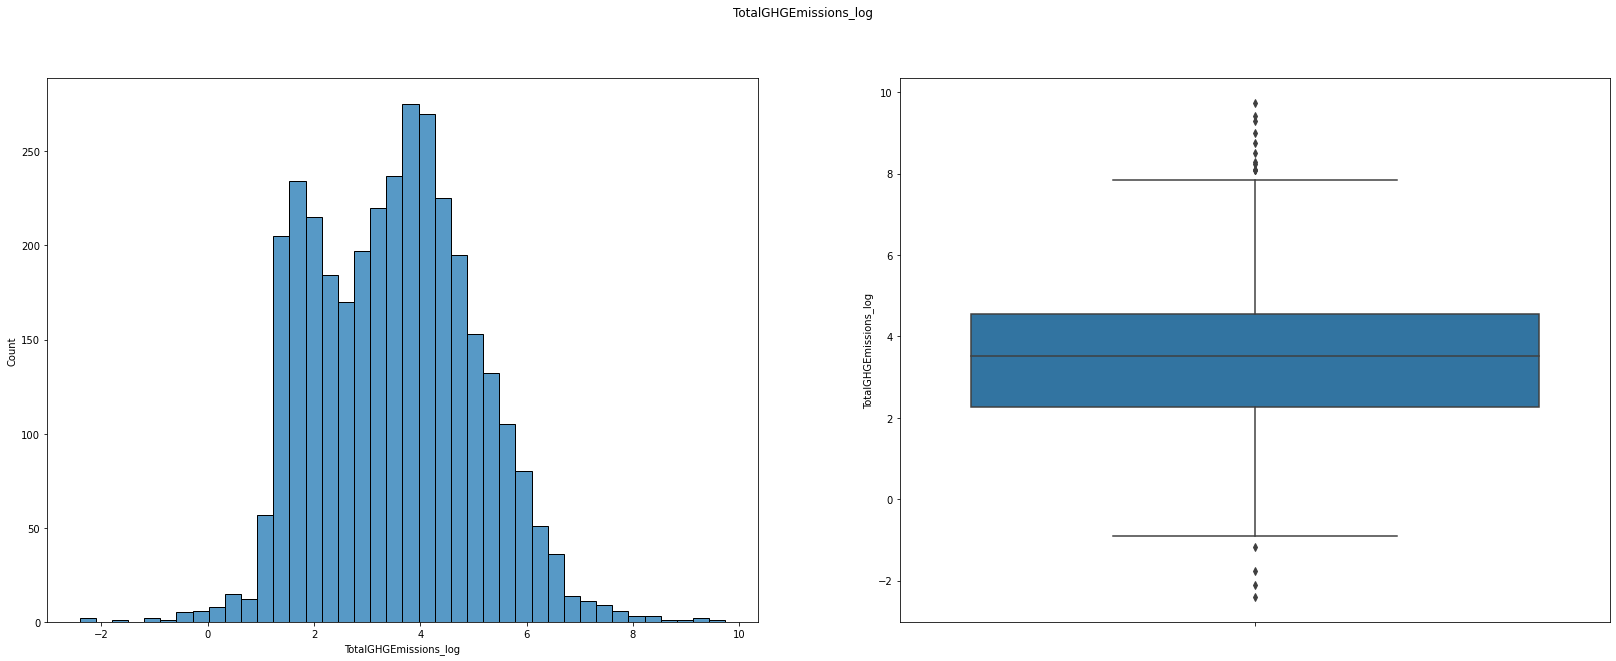

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('TotalGHGEmissions_log')

# histplot
sns.histplot(ax=axes[0], data=data_cleaned, x="TotalGHGEmissions_log")

# Boxplot
sns.boxplot(ax=axes[1], data=data_cleaned, y='TotalGHGEmissions_log')

<AxesSubplot:xlabel='TotalGHGEmissions_log', ylabel='SiteEnergyUse(kBtu)_log'>

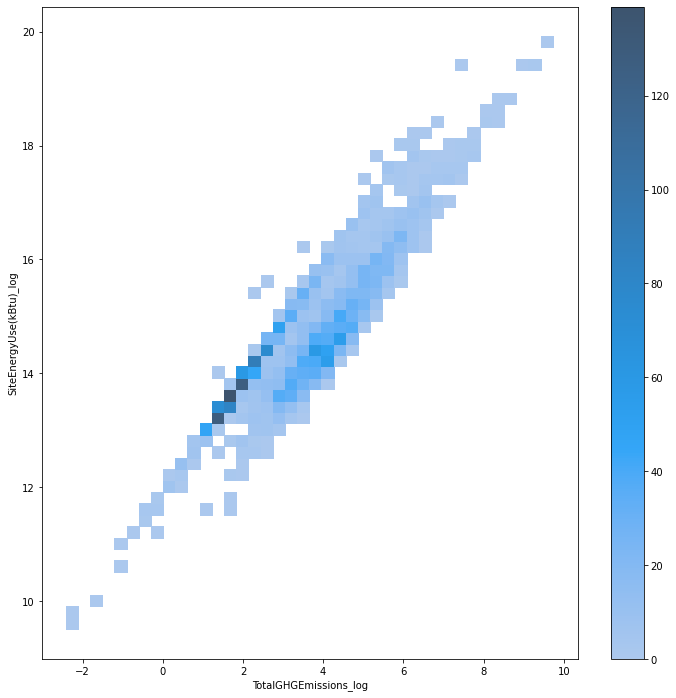

In [87]:
plt.figure(figsize=(12, 12))
sns.histplot(data=data_cleaned, x="TotalGHGEmissions_log", y='SiteEnergyUse(kBtu)_log', cbar=True)

On regarde aussi la distribution des superficies totales

In [88]:
# On passer la superficie au log
data_cleaned['PropertyGFATotal_log'] = np.log(data_cleaned['PropertyGFATotal'])

<AxesSubplot:ylabel='PropertyGFATotal_log'>

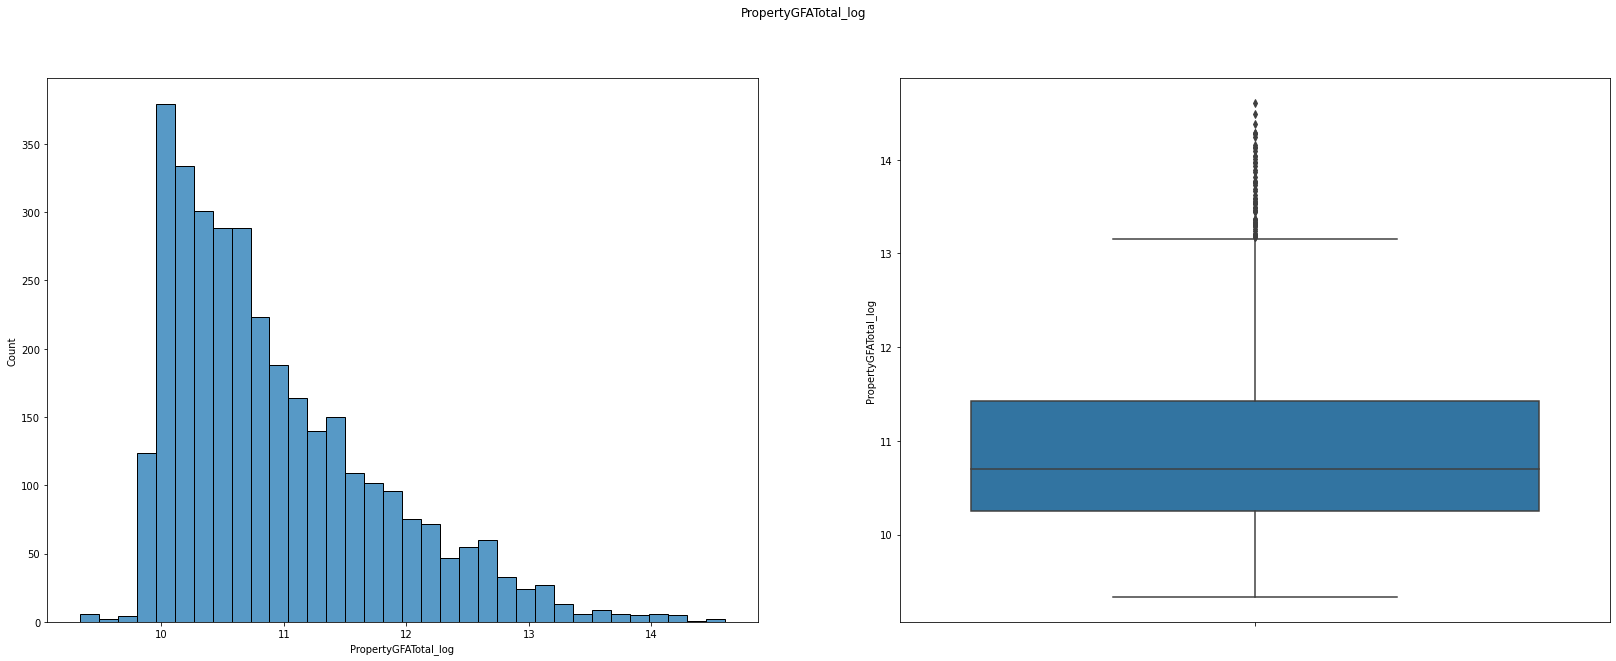

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(28, 10), sharey=False)
fig.suptitle('PropertyGFATotal_log')

# histplot
sns.histplot(ax=axes[0], data=data_cleaned, x="PropertyGFATotal_log")

# Boxplot
sns.boxplot(ax=axes[1], data=data_cleaned, y='PropertyGFATotal_log')

#### Feature Engeneering

In [90]:
# Creation de variable energy_rate = energy/GFO_Total
data_cleaned['Energy_rate'] = data_cleaned['SiteEnergyUse(kBtu)_log']/data_cleaned['PropertyGFATotal_log']

In [91]:
# Creation de variable energy_rate = energy/GFO_Total
data_cleaned['GHG_rate'] = data_cleaned['TotalGHGEmissions_log']/data_cleaned['PropertyGFATotal_log']

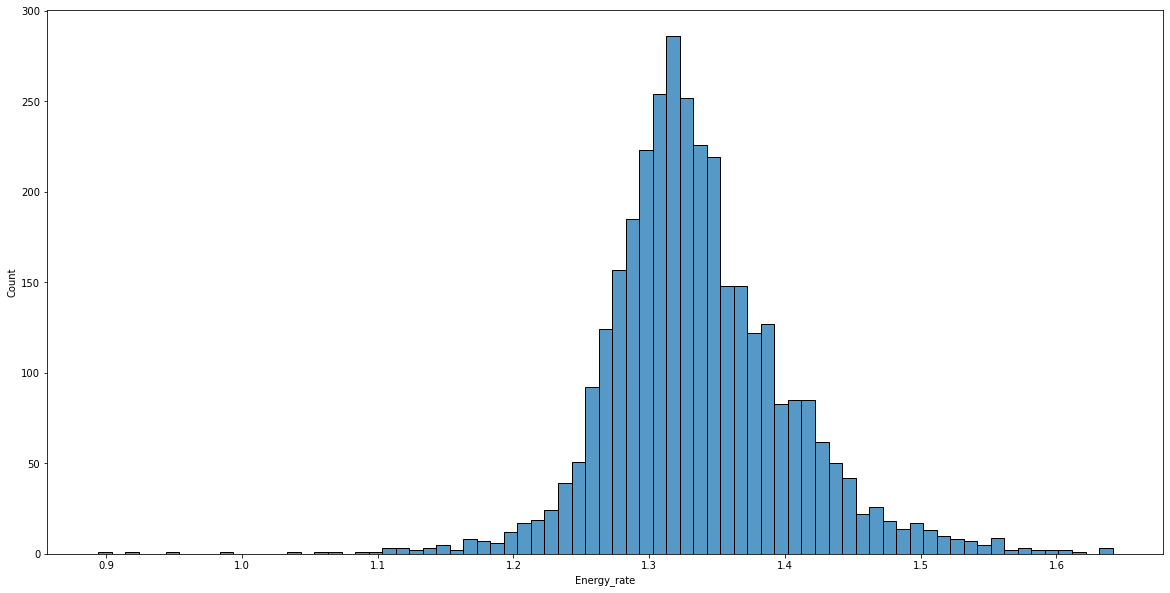

In [92]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_cleaned, x='Energy_rate')
plt.show()

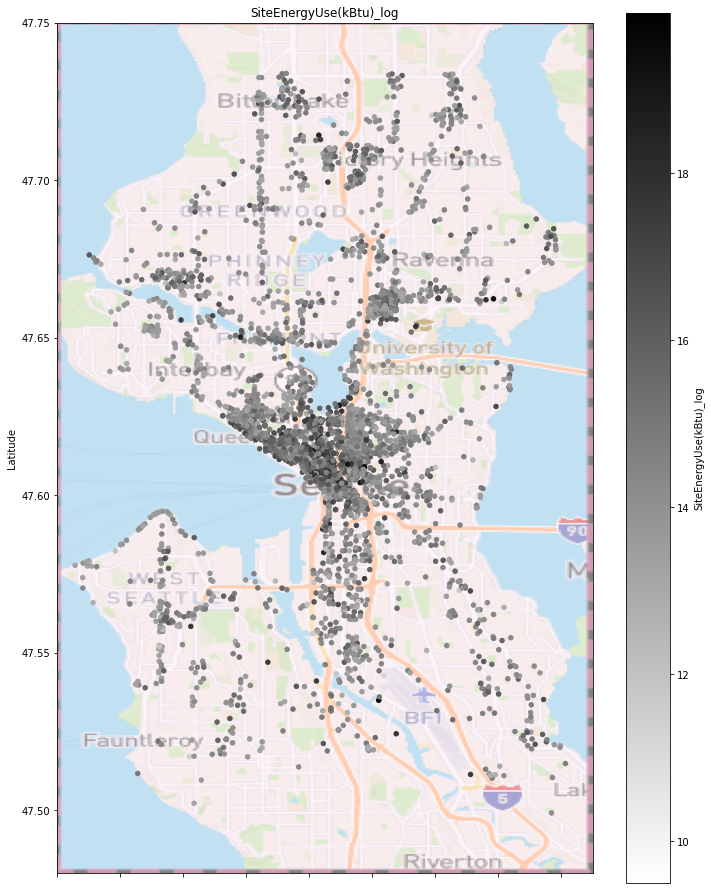

In [93]:
seattle_img2=mpimg.imread(r'C:\Users\Damien\Desktop\Data Scientist\P4\Captures\Seattle.png')
ax = data_cleaned.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(12,16),
        alpha = 1, c="SiteEnergyUse(kBtu)_log", colorbar=True, cmap=plt.get_cmap("binary"))
plt.imshow(seattle_img, extent=[-122.42, -122.25, 47.48, 47.75], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("SiteEnergyUse(kBtu)_log")
plt.show()

In [94]:
# Creation de variable Age du batiment
data_cleaned['Age'] = data_cleaned['DataYear'] - data_cleaned['YearBuilt']

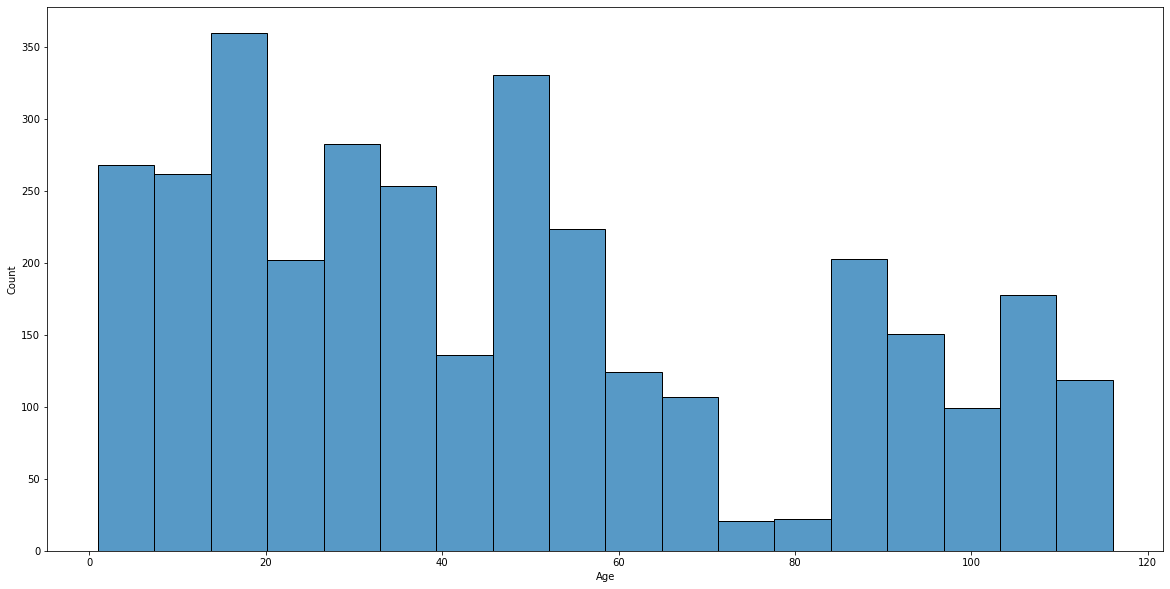

In [95]:
plt.figure(figsize=(20,10))
sns.histplot(data=data_cleaned, x='Age')
plt.show()

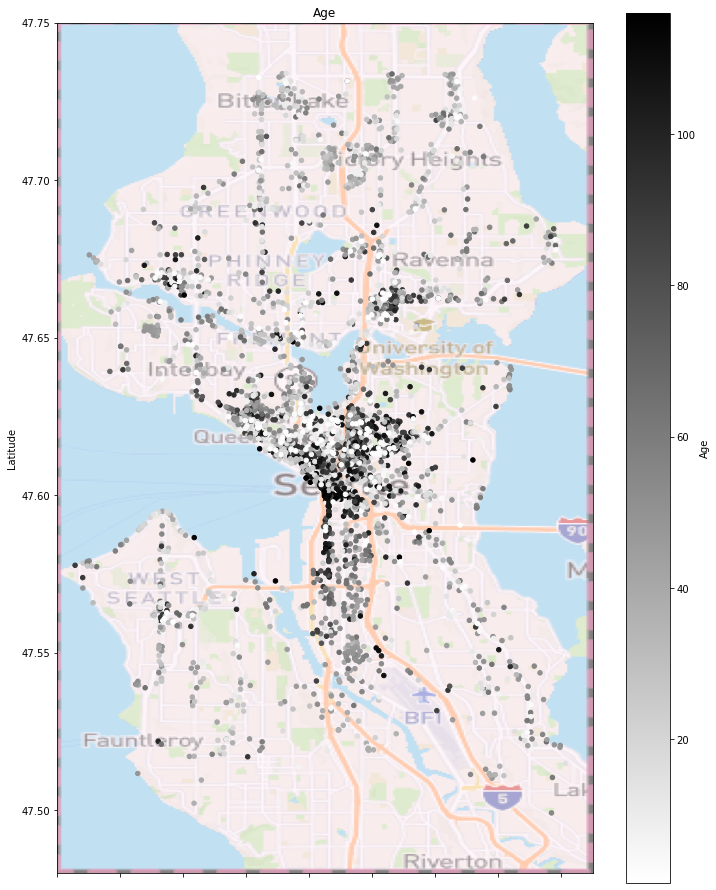

In [96]:
seattle_img2=mpimg.imread(r'C:\Users\Damien\Desktop\Data Scientist\P4\Captures\Seattle.png')
ax = data_cleaned.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(12,16),
        alpha = 1, c="Age", colorbar=True, cmap=plt.get_cmap("binary"))
plt.imshow(seattle_img, extent=[-122.42, -122.25, 47.48, 47.75], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Age")
plt.show()

In [97]:
# Passage de la colonne Parking au booleen
def Parking(row):
    if row["PropertyGFAParking"] <= 0:
        val="0"
    else:
        val="1"
    return val

data_cleaned['Parking'] = data_cleaned.apply(Parking, axis=1)

#### Visualisation

Text(0.5, 1.0, 'ENERGYSTARScore')

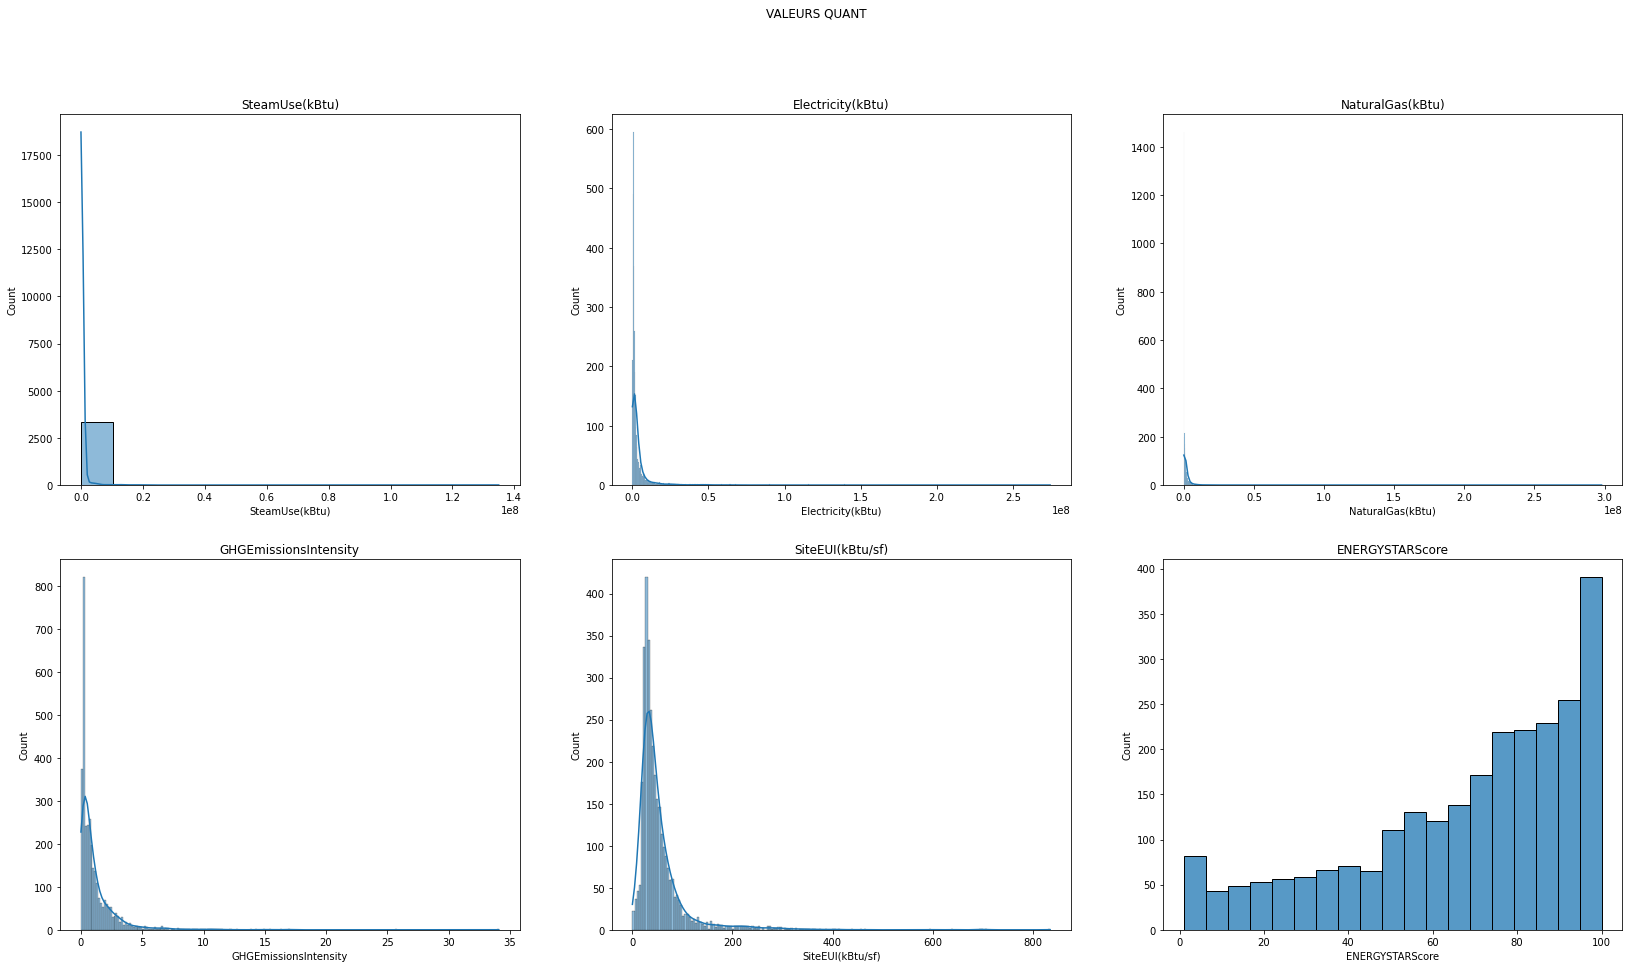

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(28, 15), sharey=False)
fig.suptitle('VALEURS QUANT')


# SteamUse(kBtu)
sns.histplot(ax=axes[0, 0], data=data_cleaned, x="SteamUse(kBtu)", kde=True)
axes[0, 0].set_title('SteamUse(kBtu)')

# Electricity(kBtu)
sns.histplot(ax=axes[0, 1], data=data_cleaned, x="Electricity(kBtu)", kde=True)
axes[0, 1].set_title('Electricity(kBtu)')

# NaturalGas(kBtu)
sns.histplot(ax=axes[0, 2], data=data_cleaned, x="NaturalGas(kBtu)", kde=True)
axes[0, 2].set_title('NaturalGas(kBtu)')

# GHGEmissionsIntensity
sns.histplot(ax=axes[1, 0], data=data_cleaned, x="GHGEmissionsIntensity", kde=True)
axes[1, 0].set_title('GHGEmissionsIntensity')

# SiteEUI(kBtu/sf)
sns.histplot(ax=axes[1, 1], data=data_cleaned, x="SiteEUI(kBtu/sf)", kde=True)
axes[1, 1].set_title('SiteEUI(kBtu/sf)')

# ENERGYSTARScore
sns.histplot(ax=axes[1, 2], data=data_cleaned, x="ENERGYSTARScore")
axes[1, 2].set_title('ENERGYSTARScore')

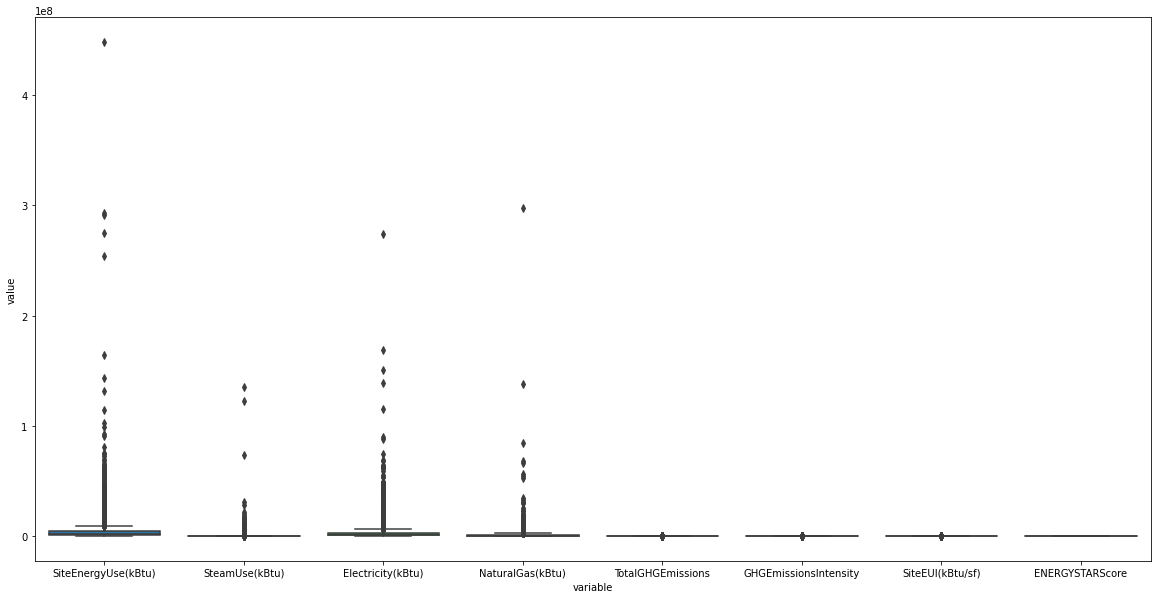

In [99]:
plt.figure(figsize=(20,10))
df = pd.DataFrame(data=data_cleaned, columns=["SiteEnergyUse(kBtu)", "SteamUse(kBtu)", "Electricity(kBtu)", "NaturalGas(kBtu)", "TotalGHGEmissions", "GHGEmissionsIntensity", "SiteEUI(kBtu/sf)", "ENERGYSTARScore"])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()
# Beaucoup d'outliers qu'il faudra filtrer

In [100]:
data_cleaned.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PropertyGFATotal_log,Energy_rate,GHG_rate,Age,Parking
0,1,2016,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,7226362.5,2003882.0,3946027.0,1276453.0,NaN,249.98,2.83,47.61220,-122.33799,15.793246,5.521381,11.390012,1.386587,0.484756,89,0
1,2,2016,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,8387933.0,0.0,3242851.0,5145082.0,NaN,295.86,2.86,47.61317,-122.33393,15.942305,5.689886,11.547964,1.380529,0.492718,20,1


Text(0.5, 1.0, 'NumberofBuildings')

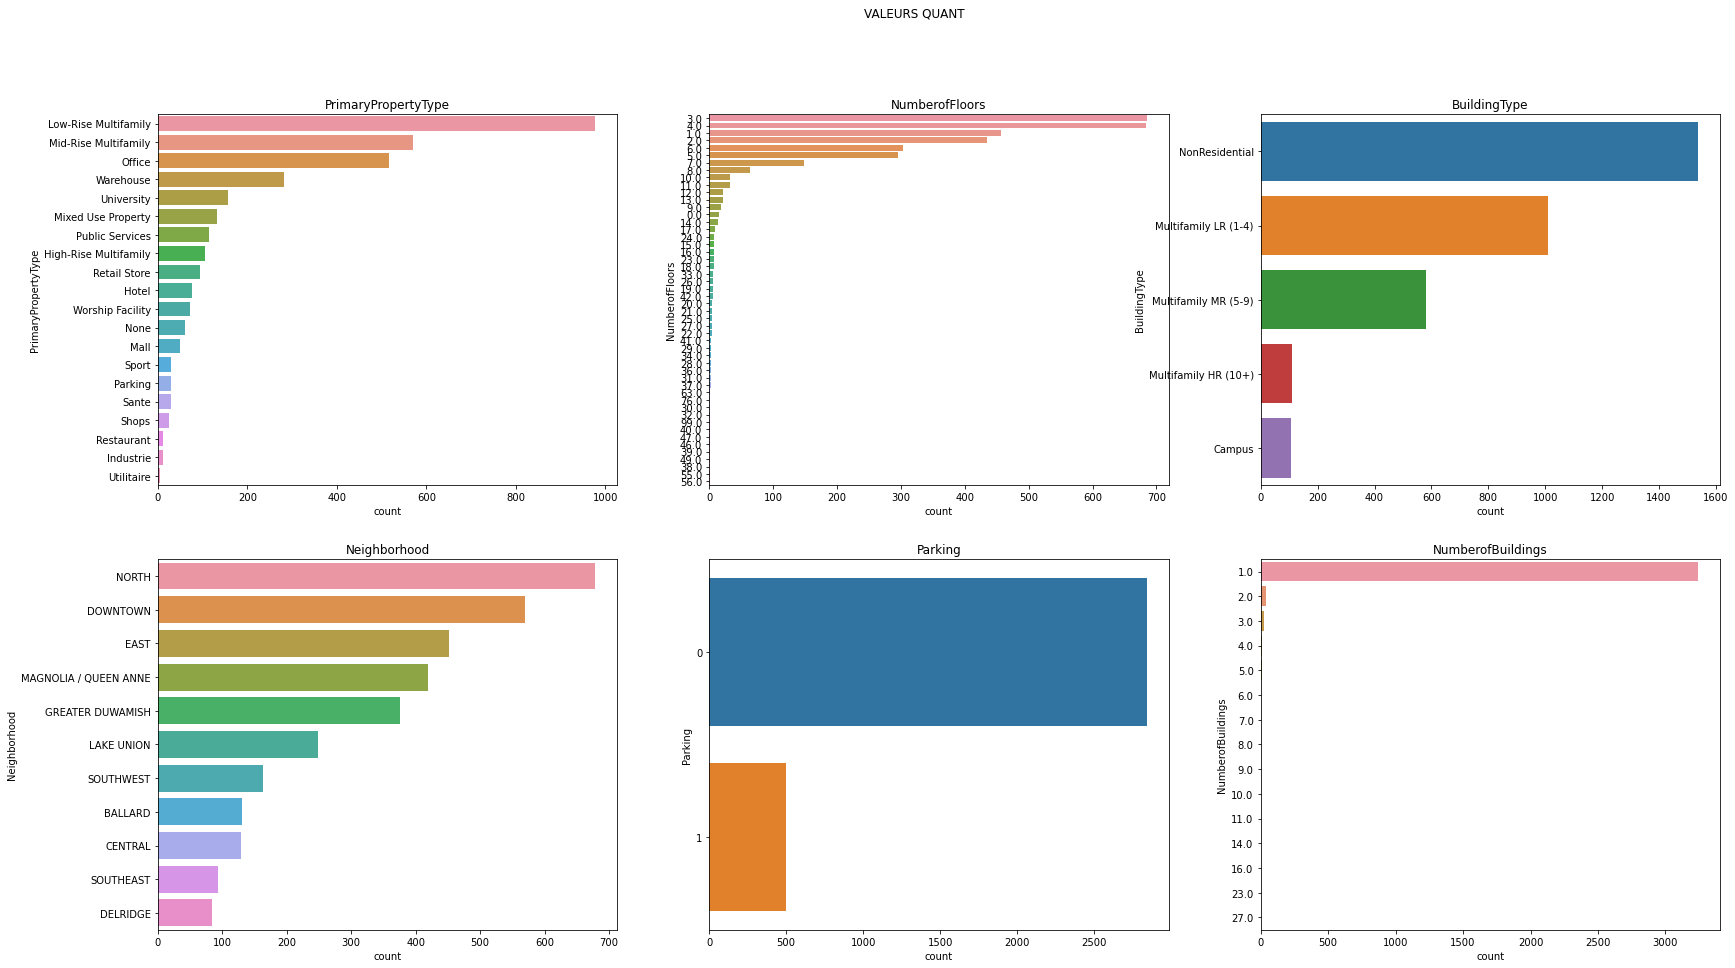

In [101]:
fig, axes = plt.subplots(2, 3, figsize=(28, 15), sharey=False)
fig.suptitle('VALEURS QUANT')


# Building type
sns.countplot(ax=axes[0, 2], data=data_cleaned, y="BuildingType", order=data_cleaned['BuildingType'].value_counts().index)
axes[0, 2].set_title('BuildingType')

# PrimaryPropertyType
sns.countplot(ax=axes[0, 0], data=data_cleaned, y="PrimaryPropertyType", order=data_cleaned['PrimaryPropertyType'].value_counts().index)
axes[0, 0].set_title('PrimaryPropertyType')

# Nombre d'etages
sns.countplot(ax=axes[0, 1], data=data_cleaned, y="NumberofFloors", order=data_cleaned['NumberofFloors'].value_counts().index)
axes[0, 1].set_title('NumberofFloors')

# Parking
sns.countplot(ax=axes[1, 1], data=data_cleaned, y="Parking")
axes[1, 1].set_title('Parking')

# Neighboorhood
sns.countplot(ax=axes[1, 0], data=data_cleaned, y="Neighborhood", order=data_cleaned['Neighborhood'].value_counts().index)
axes[1, 0].set_title('Neighborhood')

# Nombre de batiments
sns.countplot(ax=axes[1, 2], data=data_cleaned, y="NumberofBuildings")
axes[1, 2].set_title('NumberofBuildings')

### Analyse Bi-variée

In [102]:
data_cleaned.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),OtherFuelUse(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PropertyGFATotal_log,Energy_rate,GHG_rate,Age,Parking
0,1,2016,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,7226362.5,2003882.00,3946027.0,1276453.0,NaN,249.98,2.83,47.61220,-122.33799,15.793246,5.521381,11.390012,1.386587,0.484756,89,0
1,2,2016,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,8387933.0,0.00,3242851.0,5145082.0,NaN,295.86,2.86,47.61317,-122.33393,15.942305,5.689886,11.547964,1.380529,0.492718,20,1
2,3,2016,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,72587024.0,21566554.00,49526664.0,1493800.0,NaN,2089.28,2.19,47.61393,-122.33810,18.100297,7.644575,13.770628,1.314413,0.555136,47,1
3,5,2016,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,6794584.0,2214446.25,2768924.0,1811213.0,NaN,286.43,4.67,47.61412,-122.33664,15.731636,5.657494,11.023861,1.427053,0.513204,90,0
4,8,2016,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,14172606.0,0.00,5368607.0,8803998.0,NaN,505.01,2.88,47.61375,-122.34047,16.466822,6.224578,12.075850,1.363616,0.515457,36,1


In [103]:
data_cleaned['PropertyGFATotal'].dtypes

dtype('int64')

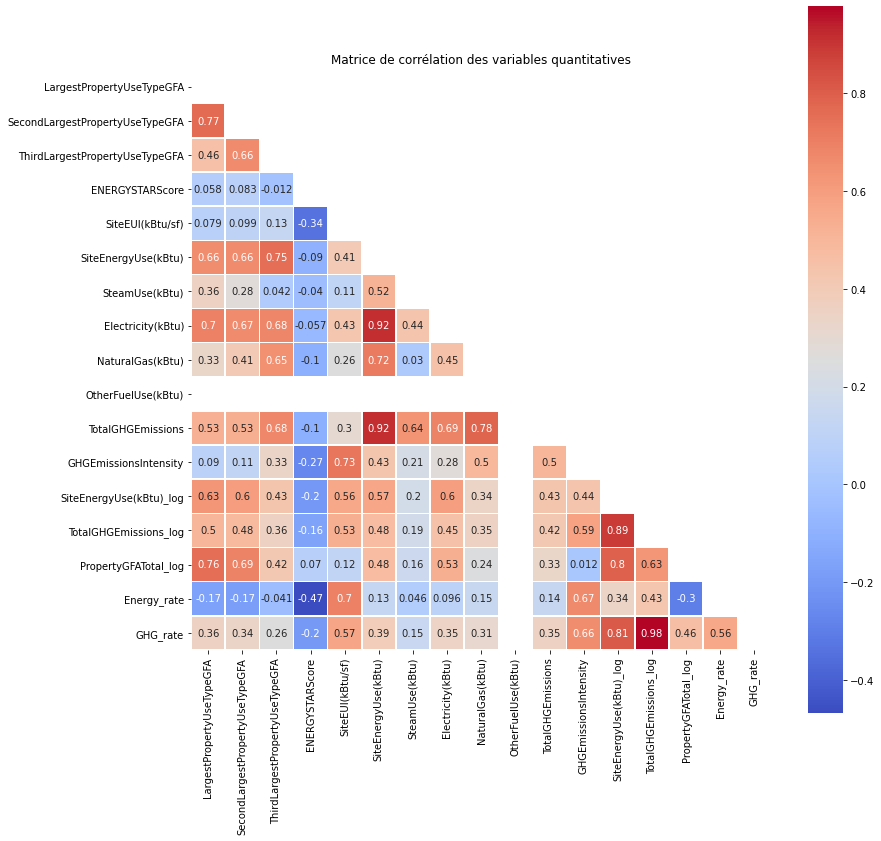

In [125]:
data_cleaned_corr = data_cleaned.copy()
cols_corr = ['NumberofFloors', 'NumberofBuildings', 'Latitude', 'Longitude']
data_cleaned_corr = data_cleaned_corr.drop(cols_corr, axis=1)

corr_matrix = data_cleaned_corr.select_dtypes('float').corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(13,13))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

# Grace aux corrélations, on peut supprimer NaturalGas(therms), Electricity(kWh), SourceEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SiteEnergyUseWN(kBtu)
# Les suffixes WN : "Weather Normalized" - Ce sont les mesures normalisées avec les conditions climatiques. Dans le cadre de notre analyse, la météo ne rentrera pas en compte.

**Forte correlation entre consommation energetique et emission de CO2**

**Forte correlation entre superficie et consommation energetique/emissions CO2**

**Logiquement forte correlation entre la consommation energetique et les differentes energies (elec, gaz et vapeur)**

#### Relation Emissions CO2 et Conso / Type batiments

Text(0.5, 1.0, 'GHG_rate')

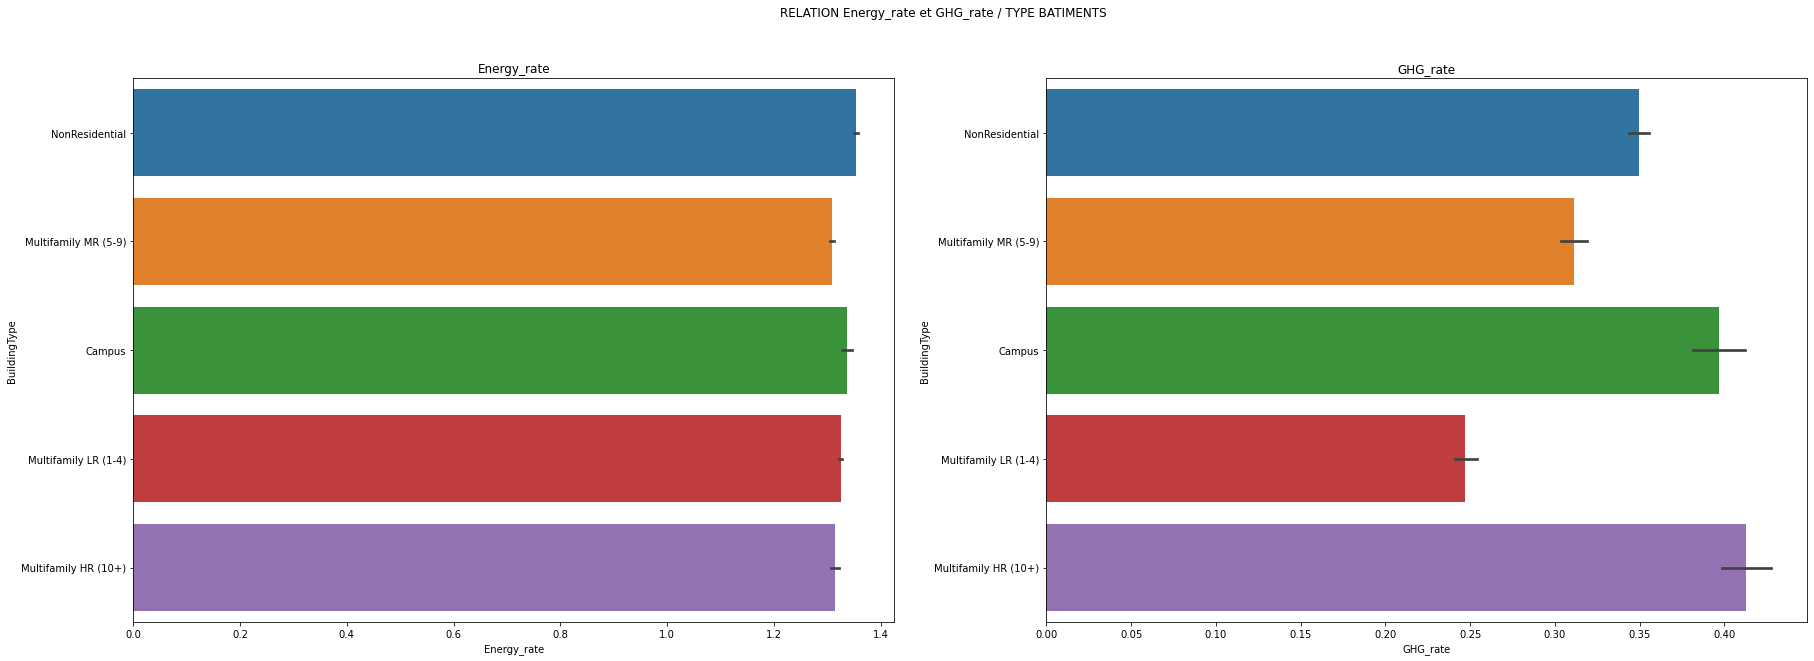

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('RELATION Energy_rate et GHG_rate / TYPE BATIMENTS')

# Energie
sns.barplot(ax=axes[0], x='Energy_rate', y='BuildingType', data=data_cleaned)
axes[0].set_title('Energy_rate')

# Co2
sns.barplot(ax=axes[1], x='GHG_rate', y='BuildingType', data=data_cleaned)
axes[1].set_title('GHG_rate')

Text(0.5, 1.0, 'GHG_rate')

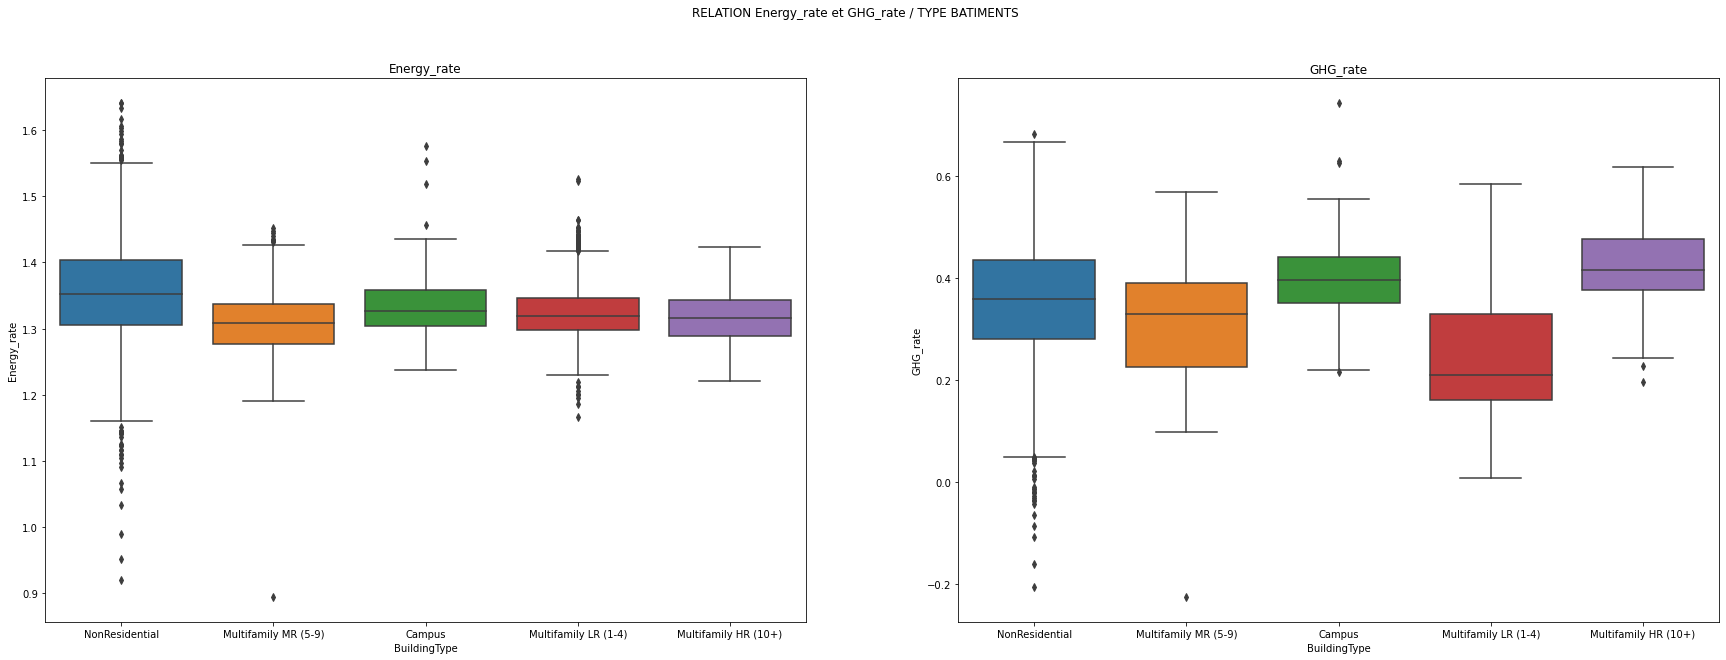

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('RELATION Energy_rate et GHG_rate / TYPE BATIMENTS')

# Energie
sns.boxplot(ax=axes[0], x='BuildingType', y='Energy_rate', data=data_cleaned)
axes[0].set_title('Energy_rate')

# Co2
sns.boxplot(ax=axes[1], x='BuildingType', y='GHG_rate', data=data_cleaned)
axes[1].set_title('GHG_rate')

In [107]:
pg.anova(data=data_cleaned, dv="Energy_rate", between="BuildingType", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,BuildingType,1.041553,4,0.260388,60.655009,1.581702e-49,0.06774
1,Within,14.334128,3339,0.004293,NaN,NaN,NaN


In [108]:
pg.anova(data=data_cleaned, dv="GHG_rate", between="BuildingType", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,BuildingType,8.296306,4,2.074076,163.833547,3.201679e-128,0.164066
1,Within,42.270593,3339,0.012660,NaN,NaN,NaN


**Le type de batiment a un effet sur l'energie rate et les emissions de CO2.**

#### Relation Emissions CO2 et Conso / Neighborhood

Text(0.5, 1.0, 'GHG_rate2')

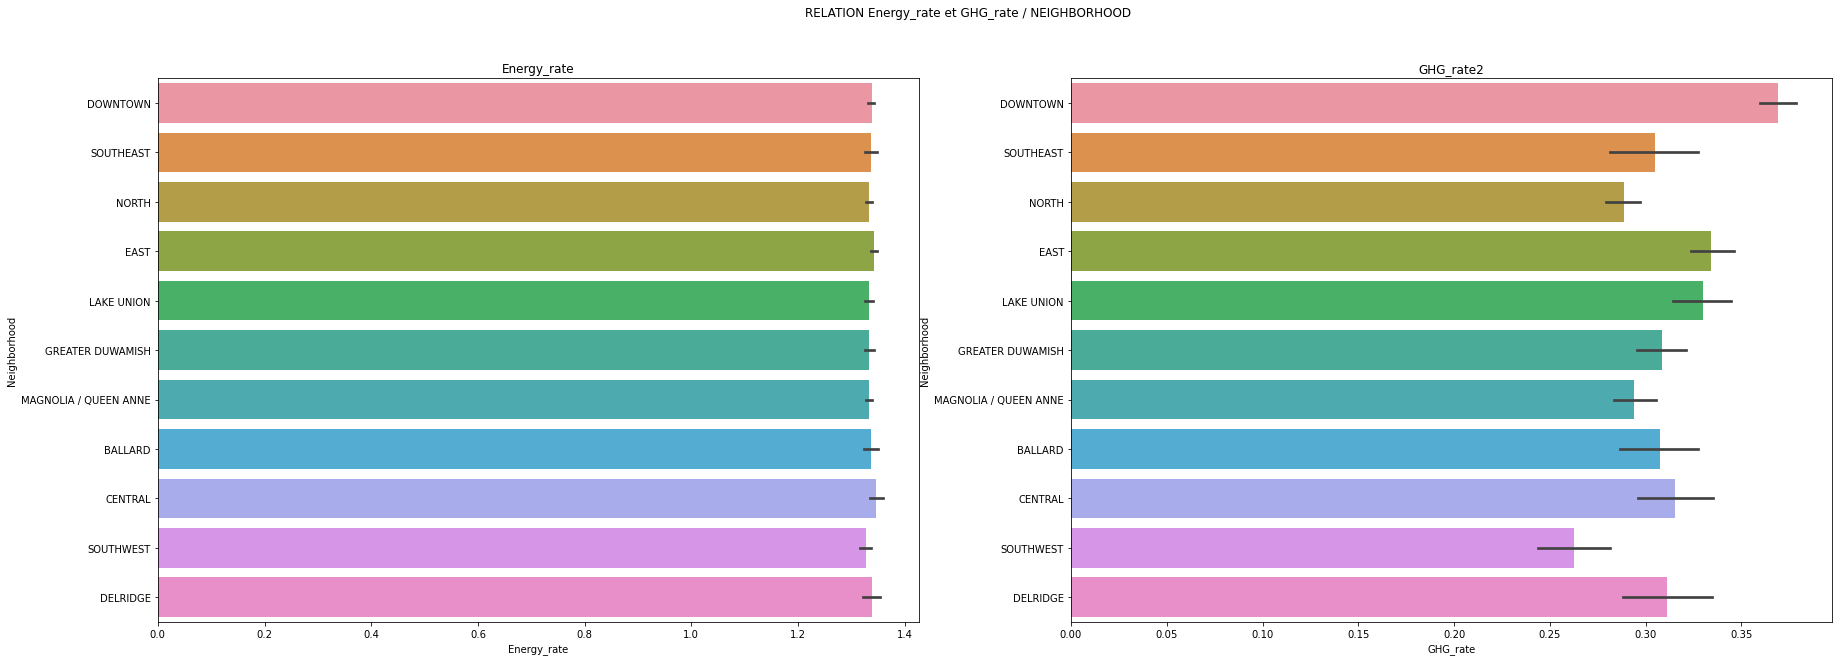

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('RELATION Energy_rate et GHG_rate / NEIGHBORHOOD')

# Energie
sns.barplot(ax=axes[0], x='Energy_rate', y='Neighborhood', data=data_cleaned)
axes[0].set_title('Energy_rate')

# Co2
sns.barplot(ax=axes[1], x='GHG_rate', y='Neighborhood', data=data_cleaned)
axes[1].set_title('GHG_rate2')

Text(0.5, 1.0, 'GHG_rate')

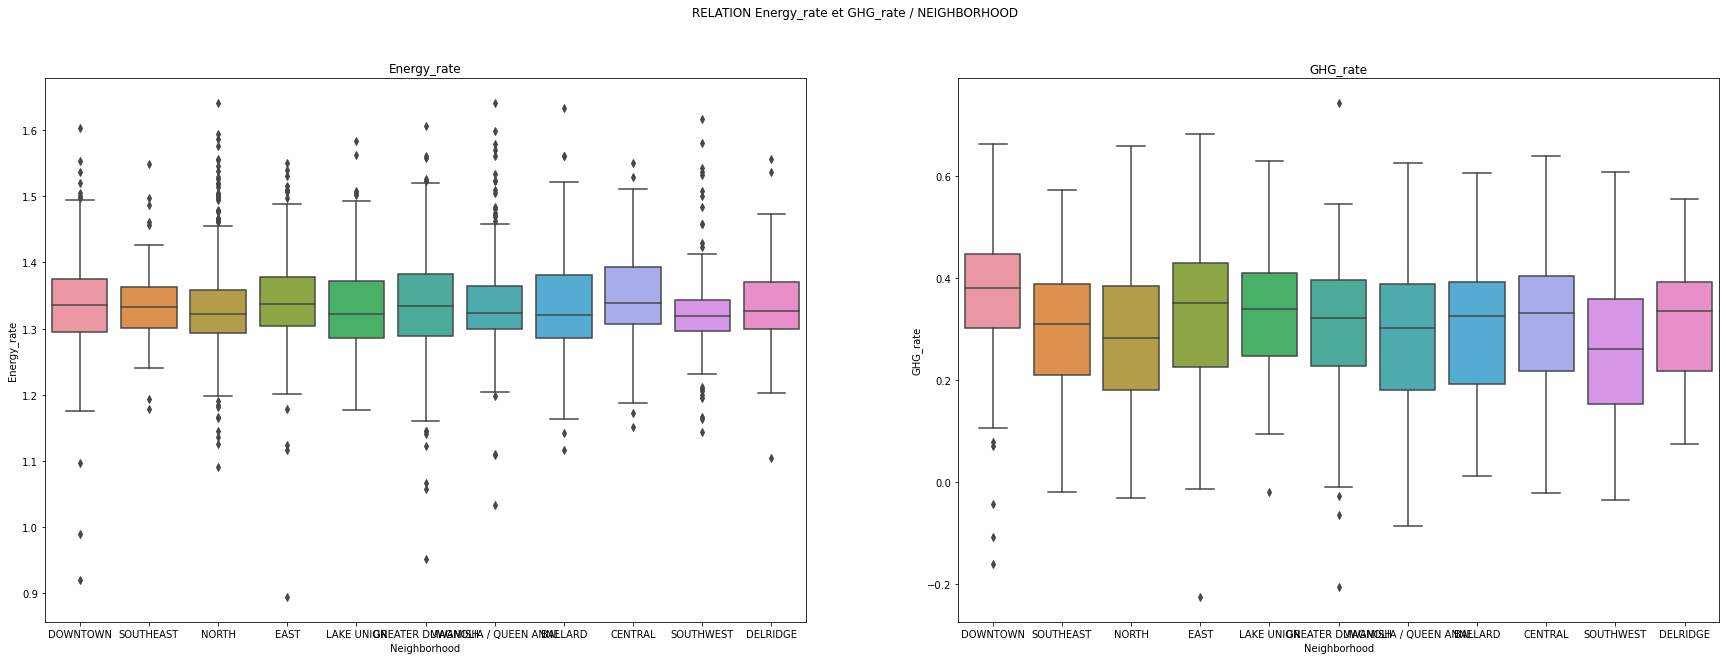

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('RELATION Energy_rate et GHG_rate / NEIGHBORHOOD')

# Energie
sns.boxplot(ax=axes[0], x='Neighborhood', y='Energy_rate', data=data_cleaned)
axes[0].set_title('Energy_rate')

# Co2
sns.boxplot(ax=axes[1], x='Neighborhood', y='GHG_rate', data=data_cleaned)
axes[1].set_title('GHG_rate')

In [111]:
pg.anova(data=data_cleaned, dv="Energy_rate", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,0.063088,10,0.006309,1.373203,0.186138,0.004103
1,Within,15.312593,3333,0.004594,NaN,NaN,NaN


In [112]:
pg.anova(data=data_cleaned, dv="GHG_rate", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,3.016399,10,0.301640,21.143121,1.301375e-38,0.059652
1,Within,47.550499,3333,0.014267,NaN,NaN,NaN


**Le quartier n'a pas d'effet sur l'energie rate mais a bien un effet sur les emissions de CO2.**

#### Relation Emissions CO2 et Conso / Age

Text(0.5, 1.0, 'Emmisions CO2')

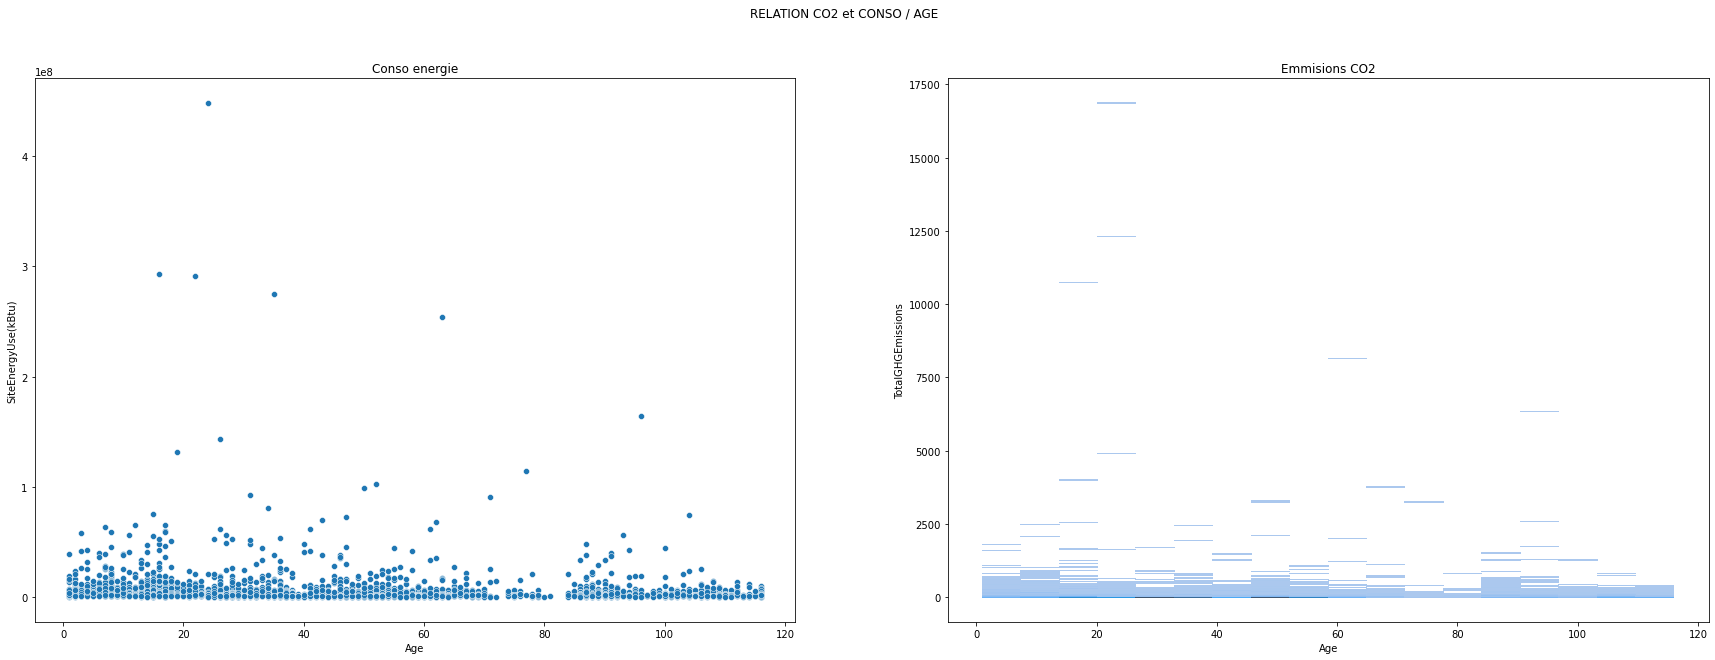

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10), sharey=False)
fig.suptitle('RELATION CO2 et CONSO / AGE')

# Energie
sns.scatterplot(ax=axes[0], x='Age', y='SiteEnergyUse(kBtu)', data=data_cleaned)
axes[0].set_title('Conso energie')

# Co2
sns.histplot(ax=axes[1], x='Age', y='TotalGHGEmissions', data=data_cleaned)
axes[1].set_title('Emmisions CO2')

In [114]:
pg.anova(data=data_cleaned, dv="SiteEnergyUse(kBtu)", between="Age", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Age,3.409958e+16,112,3.044605e+14,1.253915,0.03867,0.041655
1,Within,7.845127e+17,3231,2.428080e+14,NaN,NaN,NaN


In [115]:
pg.anova(data=data_cleaned, dv="SiteEnergyUse(kBtu)", between="Age", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Age,3.409958e+16,112,3.044605e+14,1.253915,0.03867,0.041655
1,Within,7.845127e+17,3231,2.428080e+14,NaN,NaN,NaN


**L'age des batiments n'a pas d'effet sur la consommation d'énergie ou les emissions de CO2.**

#### Relation Neighborhood / Superficie - Age - Nombre d'étages - Energy_rate

Text(0.5, 1.0, 'Energy_rate')

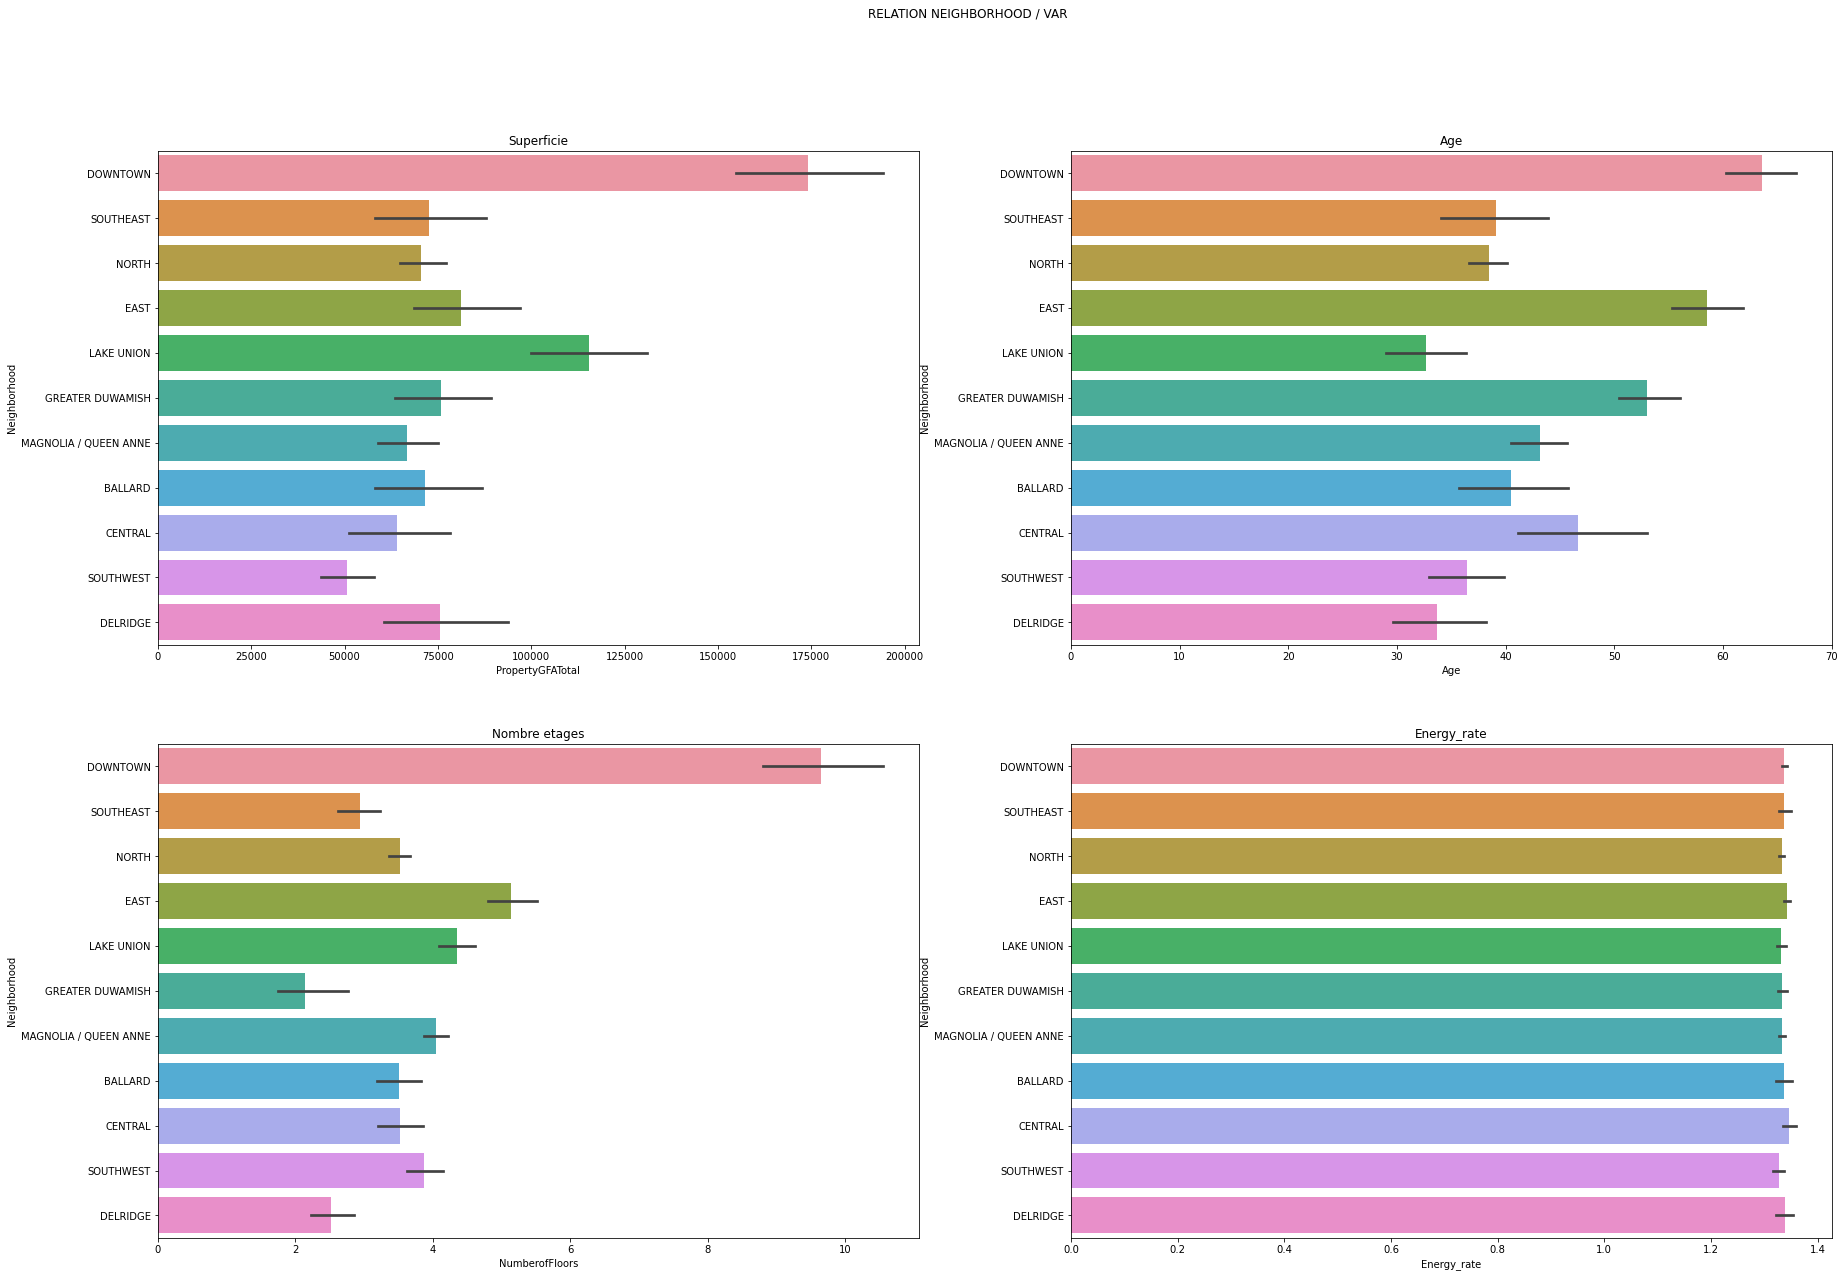

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20), sharey=False)
fig.suptitle('RELATION NEIGHBORHOOD / VAR')

# Superficie
sns.barplot(ax=axes[0, 0], x='PropertyGFATotal', y='Neighborhood', data=data_cleaned)
axes[0, 0].set_title('Superficie')

# Age
sns.barplot(ax=axes[0, 1], x='Age', y='Neighborhood', data=data_cleaned)
axes[0, 1].set_title('Age')

# Nombre d'étages
sns.barplot(ax=axes[1, 0], x='NumberofFloors', y='Neighborhood', data=data_cleaned)
axes[1, 0].set_title('Nombre etages')

# Energy_rate
sns.barplot(ax=axes[1, 1], x='Energy_rate', y='Neighborhood', data=data_cleaned)
axes[1, 1].set_title('Energy_rate')

In [117]:
pg.anova(data=data_cleaned, dv="PropertyGFATotal", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,5.207314e+12,10,5.207314e+11,24.970877,4.055951e-46,0.069698
1,Within,6.950488e+13,3333,2.085355e+10,NaN,NaN,NaN


In [118]:
pg.anova(data=data_cleaned, dv="Age", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,3.807875e+05,10,38078.748373,38.647569,1.522169e-72,0.103906
1,Within,3.283944e+06,3333,985.281859,NaN,NaN,NaN


In [119]:
pg.anova(data=data_cleaned, dv="NumberofFloors", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,18764.660545,10,1876.466054,75.432638,8.320240e-140,0.184553
1,Within,82911.874144,3333,24.876050,NaN,NaN,NaN


In [120]:
pg.anova(data=data_cleaned, dv="Energy_rate", between="Neighborhood", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Neighborhood,0.063088,10,0.006309,1.373203,0.186138,0.004103
1,Within,15.312593,3333,0.004594,NaN,NaN,NaN


**Le quartier a un effet modéré sur la superficie et l'age des batiments, et un effet important sur le nombre d'étages**

### Ordre grandeur conso et emissions / catégorie

In [121]:
data_cleaned.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False)

PrimaryPropertyType
Sante                    2185.599310
Hotel                     410.882727
Parking                   278.143103
Industrie                 274.115455
Mixed Use Property        272.934848
Mall                      238.594400
High-Rise Multifamily     220.010381
Sport                     206.599310
Public Services           203.761228
None                      190.967049
University                155.805732
Restaurant                154.452727
Office                    113.512074
Retail Store               91.768947
Mid-Rise Multifamily       64.329316
Shops                      59.455000
Warehouse                  42.231922
Worship Facility           42.180704
Utilitaire                 29.947500
Low-Rise Multifamily       26.591534
Name: TotalGHGEmissions, dtype: float64

In [122]:
data_cleaned.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False)

PrimaryPropertyType
Sante                    6.381441e+07
Industrie                3.370749e+07
Hotel                    1.255155e+07
Parking                  1.184092e+07
Mixed Use Property       1.083570e+07
Mall                     1.080524e+07
None                     8.701264e+06
High-Rise Multifamily    8.665963e+06
Office                   8.390161e+06
Public Services          7.426072e+06
Sport                    6.019453e+06
University               5.492586e+06
Restaurant               4.696249e+06
Retail Store             4.673445e+06
Shops                    3.068748e+06
Mid-Rise Multifamily     2.819814e+06
Utilitaire               2.428661e+06
Warehouse                2.024951e+06
Low-Rise Multifamily     1.349221e+06
Worship Facility         1.171907e+06
Name: SiteEnergyUse(kBtu), dtype: float64

**Les hopitaux consomment les plus d'energie et emettent le plus de Co2**

In [123]:
data_cleaned.to_csv(r"C:\Users\Damien\Desktop\Data Scientist\P4\Dataset\seattle_dataset.csv")